# **Perkenalan**
Team :

* Ida Nur Laela (PYTN-KS11-013)
* Satrio Muhammad F R (PYTN-KS11-016)
* Rizka Latifatul H (PYTN-KS11-018)

Python for Data Science - Studi Independen - Kampus Merdeka

## **Latar Belakang**
Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia di website kaggle (https://www.kaggle.com/arjunbhasin2013/ccdata). Dataset ini berisi perilaku belanja dan data tidak berlabel yang berkaitan dengan transaksi kartu kredit. Tujuan utama dari penelitian ini adalah untuk menunjukkan segmentasi pelanggan yang paling sesuai dengan dataset ini dengan mengimplementasikan analisa clustering.

Algoritma dan metode yang digunakan pada projek ini yaitu algoritma K-Means Clustering, pemilihan algoritma K-means clustering dikarenakan algoritma tersebut lebih efisien dalam menangani dataset yang besar, algoritma sederhana yang mudah untuk dimengerti dan diterapkan. Selain K-means, terdapat teknik lain yang akan digunakan yaitu Principal Component Analysis (PCA) sebagai reduction dimension dataset dengan mengidentifikasi pola untuk mengurangi dimensi dataset. Penggunaan metode PCA juga dapat membantu mengoptimalkan hasil cluster dari K-means clustering dengan mendeteksi cluster tambahan dibandingkan dengan jumlah optimal cluster pada K-means tanpa menggunakan PCA. Dataset ini memiliki dimensi yang tinggi dan variabel-variabel yang berkorelasi. Data ini berisi transaksi pengguna kartu kredit sebanyak 8949 orang selama 6 bulan, dataset kartu kredit ini memiliki 18 atribut. 

**Attribute Information:**

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

## **Objektif**
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

● Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn

● Mampu mempersiapkan data untuk digunakan dalam Clustering

● Mampu mengimplementasikan Clustering pada data yang diberikan

# **Import Pustaka**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

warnings.filterwarnings("ignore")
%matplotlib inline

# **Data Loading**

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

### Memasukkan Dataset, dataset yang di pakai pada program ini ialah dataset CC GENERAL, lalu menampilkan data teratas dan terbawah.

In [2]:
df = pd.read_csv('CC GENERAL.CSV')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Data dalam dataset tersebut bertipe kontinue

In [6]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Bisa dilihat bahwa pada beberapa kolom memiliki outlier dan mean memiliki nilai yang lebih besar dibandingkan dengan median hal ini menunjukkan bahwa terdapat beberapa skewness pada dataset.

### Melakukan pengecekan missing value

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dataset tersebut terdapat missin value pada kolom CREDIT-LIMIT sebesar 1 dan MINIMUM-PAYMENTS sebesar 313. 

<AxesSubplot:>

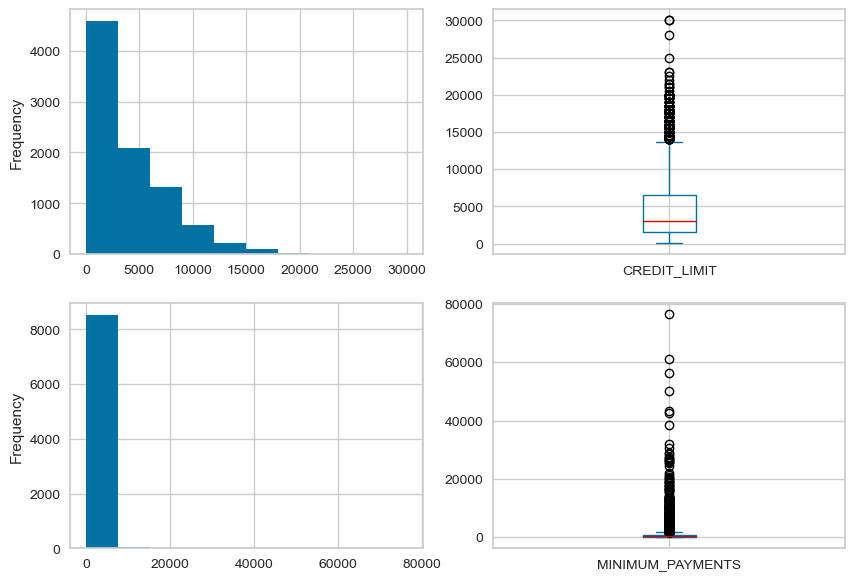

In [8]:
# Histogram dan boxplot kolom CREDIT_LIMIT & MINIMUM_PAYMENTS

fig = plt.figure(figsize=(10,7))

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

df['CREDIT_LIMIT'].plot(kind='hist', ax=ax0)
df['CREDIT_LIMIT'].plot(kind='box', ax=ax1)
df['MINIMUM_PAYMENTS'].plot(kind='hist', ax=ax2)
df['MINIMUM_PAYMENTS'].plot(kind='box', ax=ax3)

Karena kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS memiliki banyak outlier atau pecilan dan skewed, maka missing values akan diisi dengan nilai median.

### Melakukan pengecekan duplikasi data

In [9]:
df.duplicated().value_counts()

False    8950
dtype: int64

Dataset tersebut tidak terdapat duplikasi data.

# Data Cleaning dan EDA : Explorasi Data Analysis
Selanjutnya eksplorasi data dilakukan untuk memahami data lebih dalam dan memeriksa statistik deskriptif serta distribusinya untuk kepentingan pengelompokkan klaster kumpulan data.

## Pengisian missing value

In [10]:
ms_col = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']
for col in ms_col:
    df.loc[df[col].isna()==True,col] = df[col].mean()
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Setelah dataset diisi dengan metode median maka sudah tidak terdapat missing value.

## Pengahpusan kolom yang tidak berpengaruh

In [11]:
df.drop('CUST_ID', axis=1, inplace=True)

In [12]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

## Mengecek Correlation Matrix

In [13]:
# memeriksa koefisien korelasi antar kolom
df.corr()

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

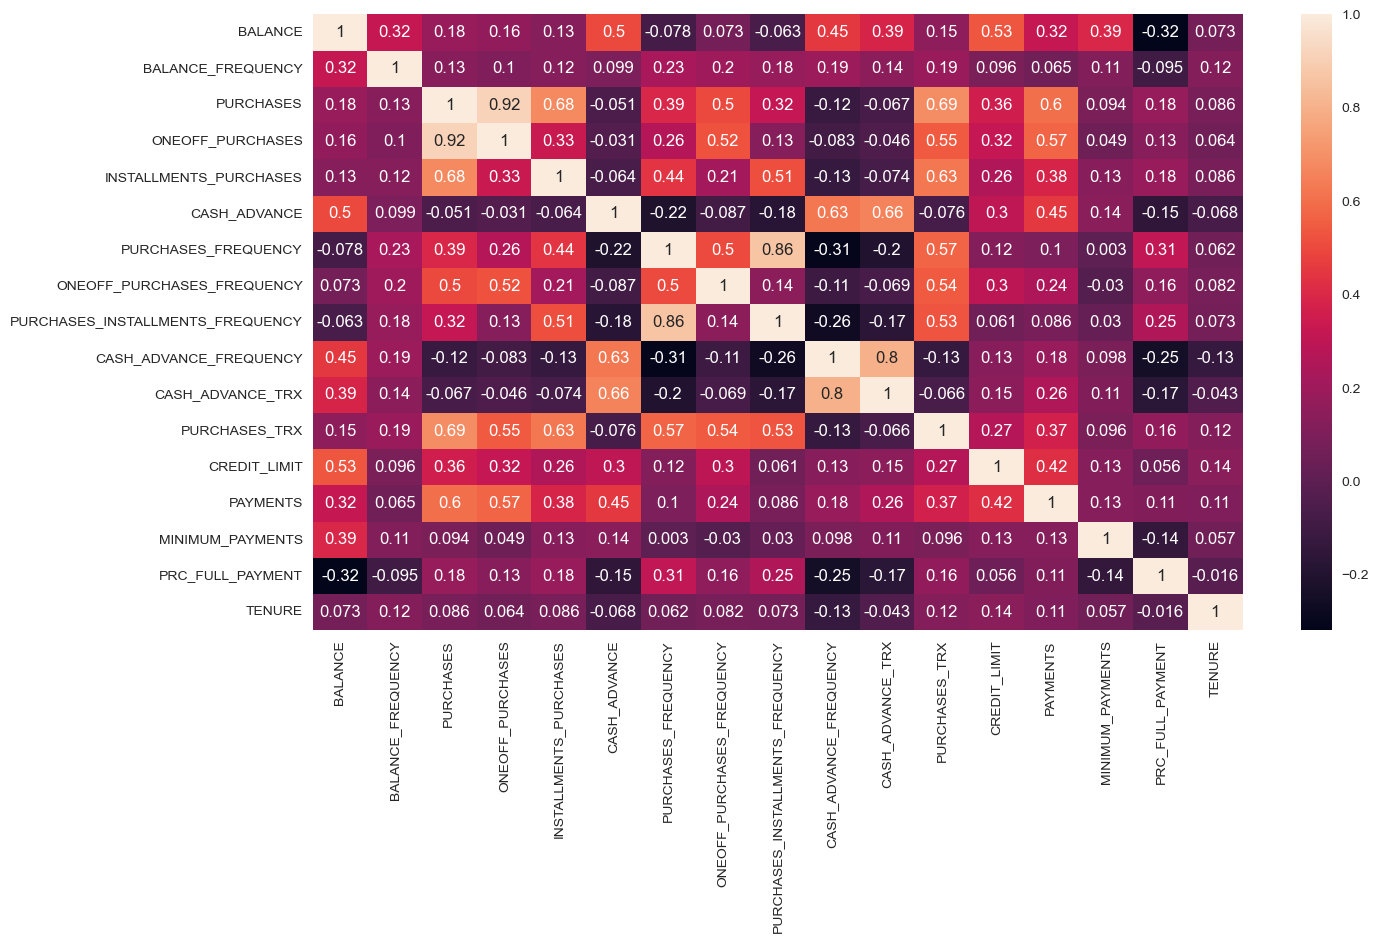

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.savefig('corr_matrix.png')

Berdasarkan heatmap plot di atas, dapat diketahui bahwa:

1. Saldo (BALANCE) berkorelasi positif dengan uang panjar (CASH_ADVANCE) (atau uang muka yang diberikan oleh pengguna) dan limit kredit (CREDIT_LIMIT). Ini berarti limit kredit dan uang yang diberikan oleh pengguna, maka semakin banyak saldonya.
2. Transaksi pembelian (PURCHASES) berkorelasi positif dengan pembelian dalam satu kali transaksi (ONEOFF_PURCHASES) dan pembelian angsuran (INSTALLMENTS_PURCHASES). Dapat diartikan bahwa pengguna banyak melakukan transaksi dalam satu kali dan juga dalam bentuk cicilan/angsuran.
3. Limit kredit berkorelasi positif dengan saldo, pembelian, dan pembayaran. Artinya semakin tinggi jumlah limit kredit akan diikuti dengan semakin banyak nominal saldo, pembelian, dan pembayaran yang dilakukan pengguna.

## Mengecek Outlier

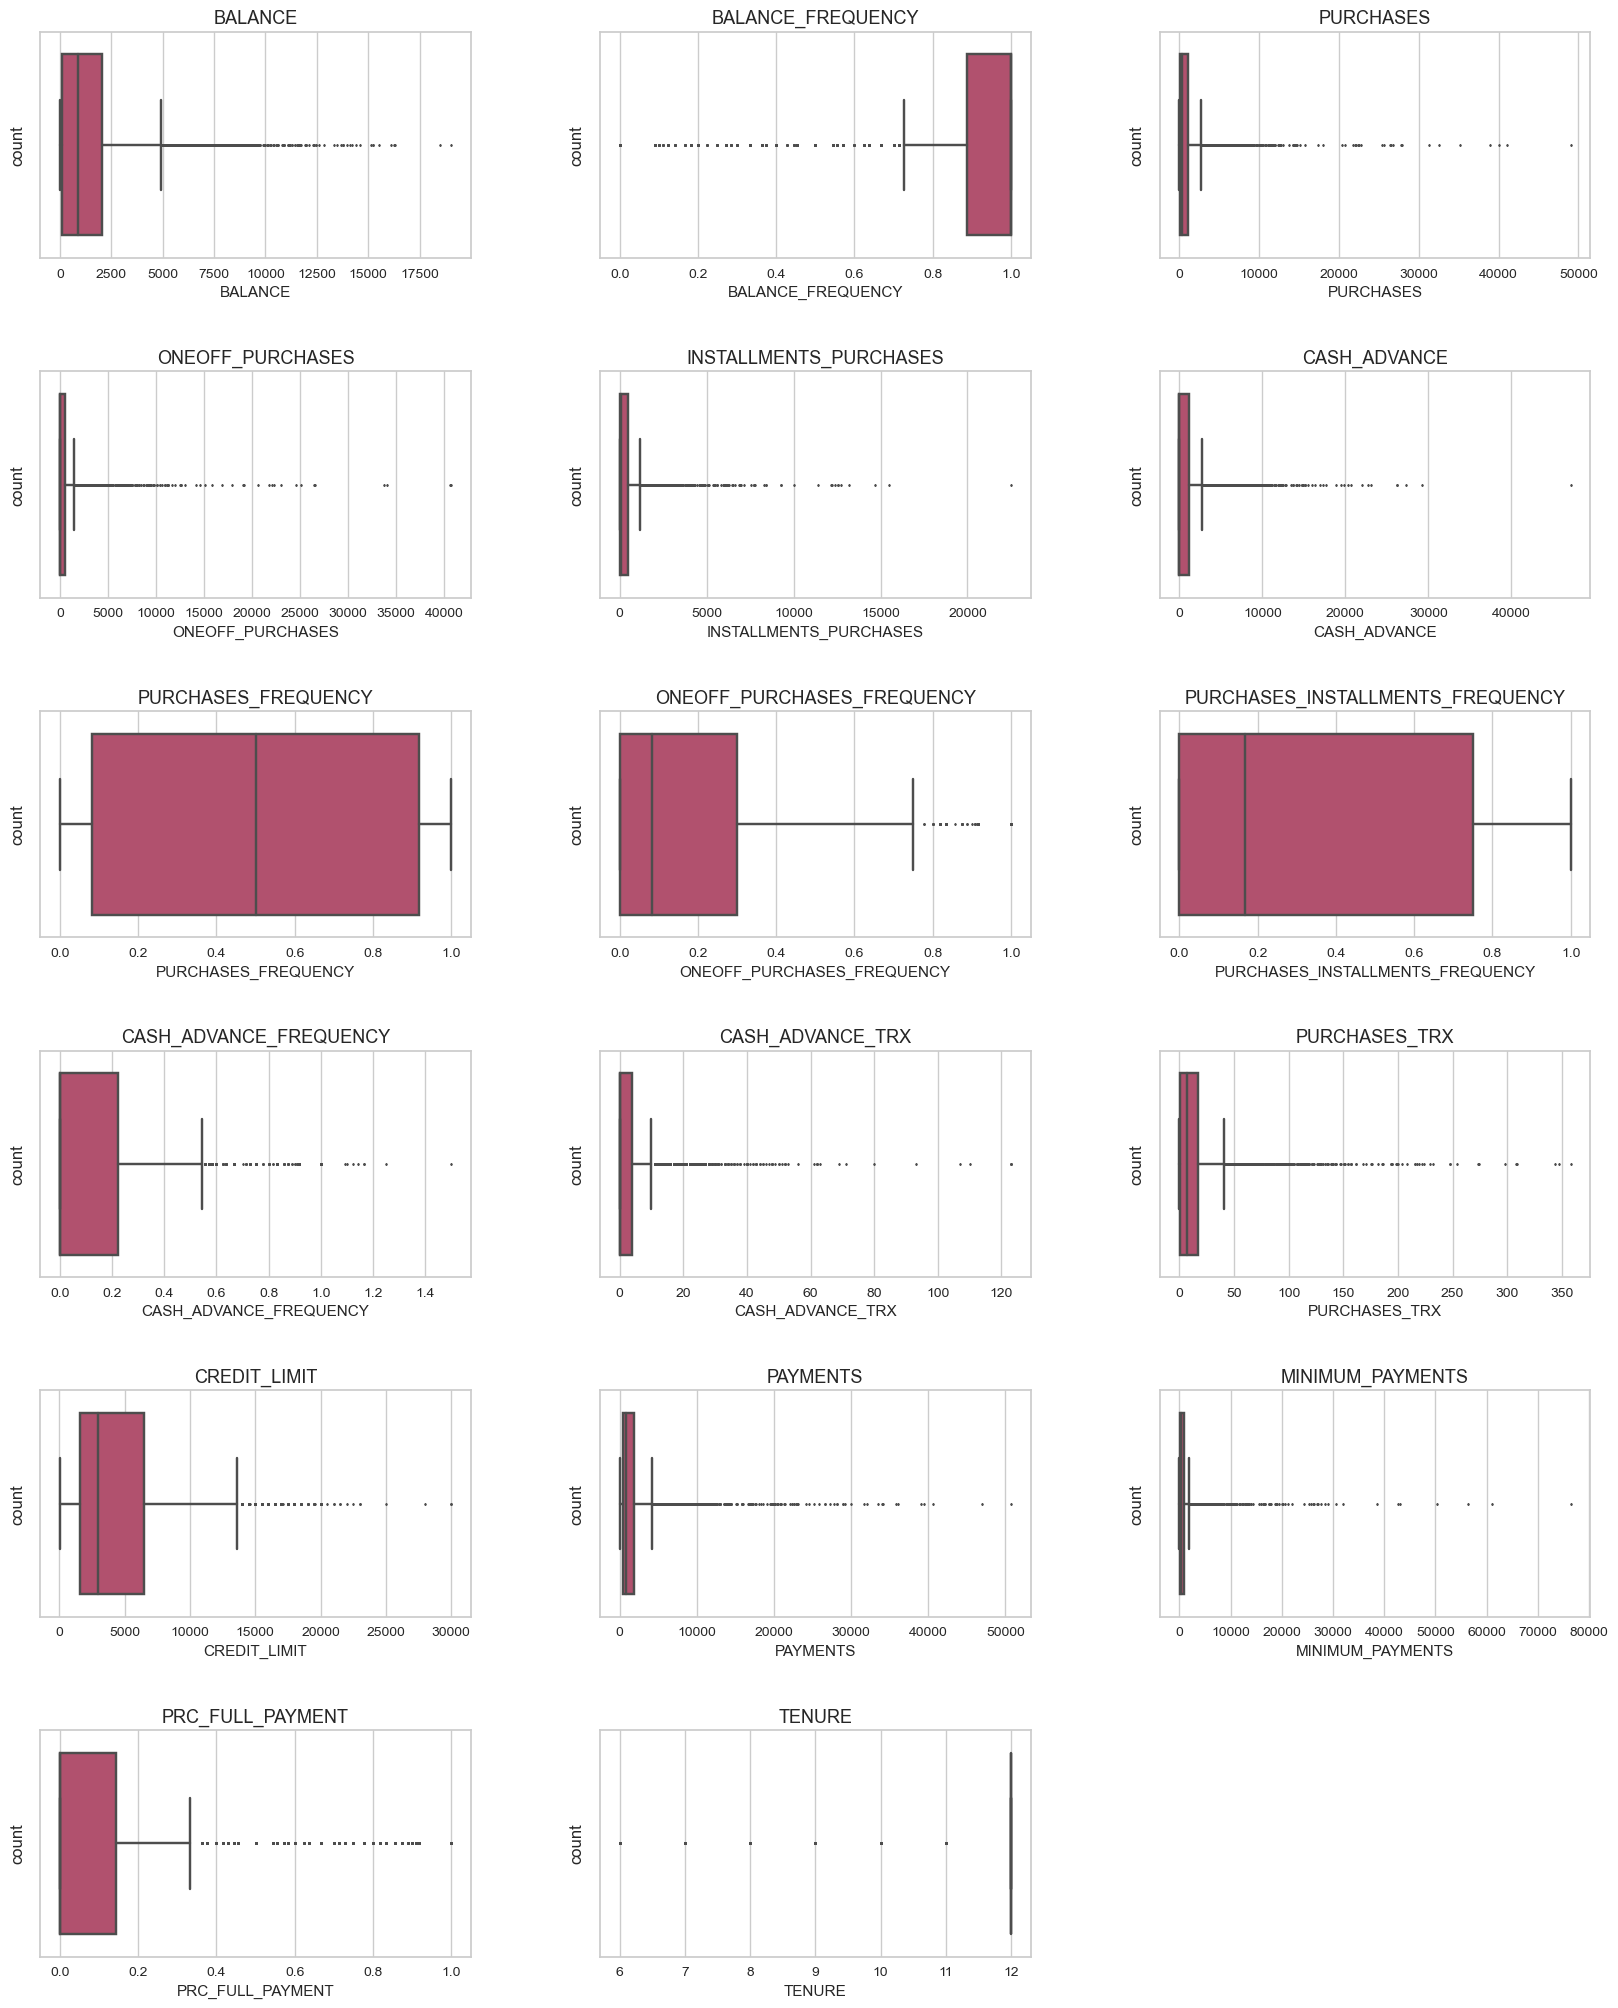

In [15]:
cols = df.columns.to_list()
plt.figure(figsize =(20,25))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)
    plt.savefig('outliers_cek.png')

Dari hasil output diatas dilihat banyak fitur memiliki outliers, namun outlier yang ditampilkan seperti outlier natural yang berarti ada kemungkinan nasabah melakukan transaksi dengan jumlah uang yang sangat besar.

## Plotting variabel frekuensi menjadi chart diagram

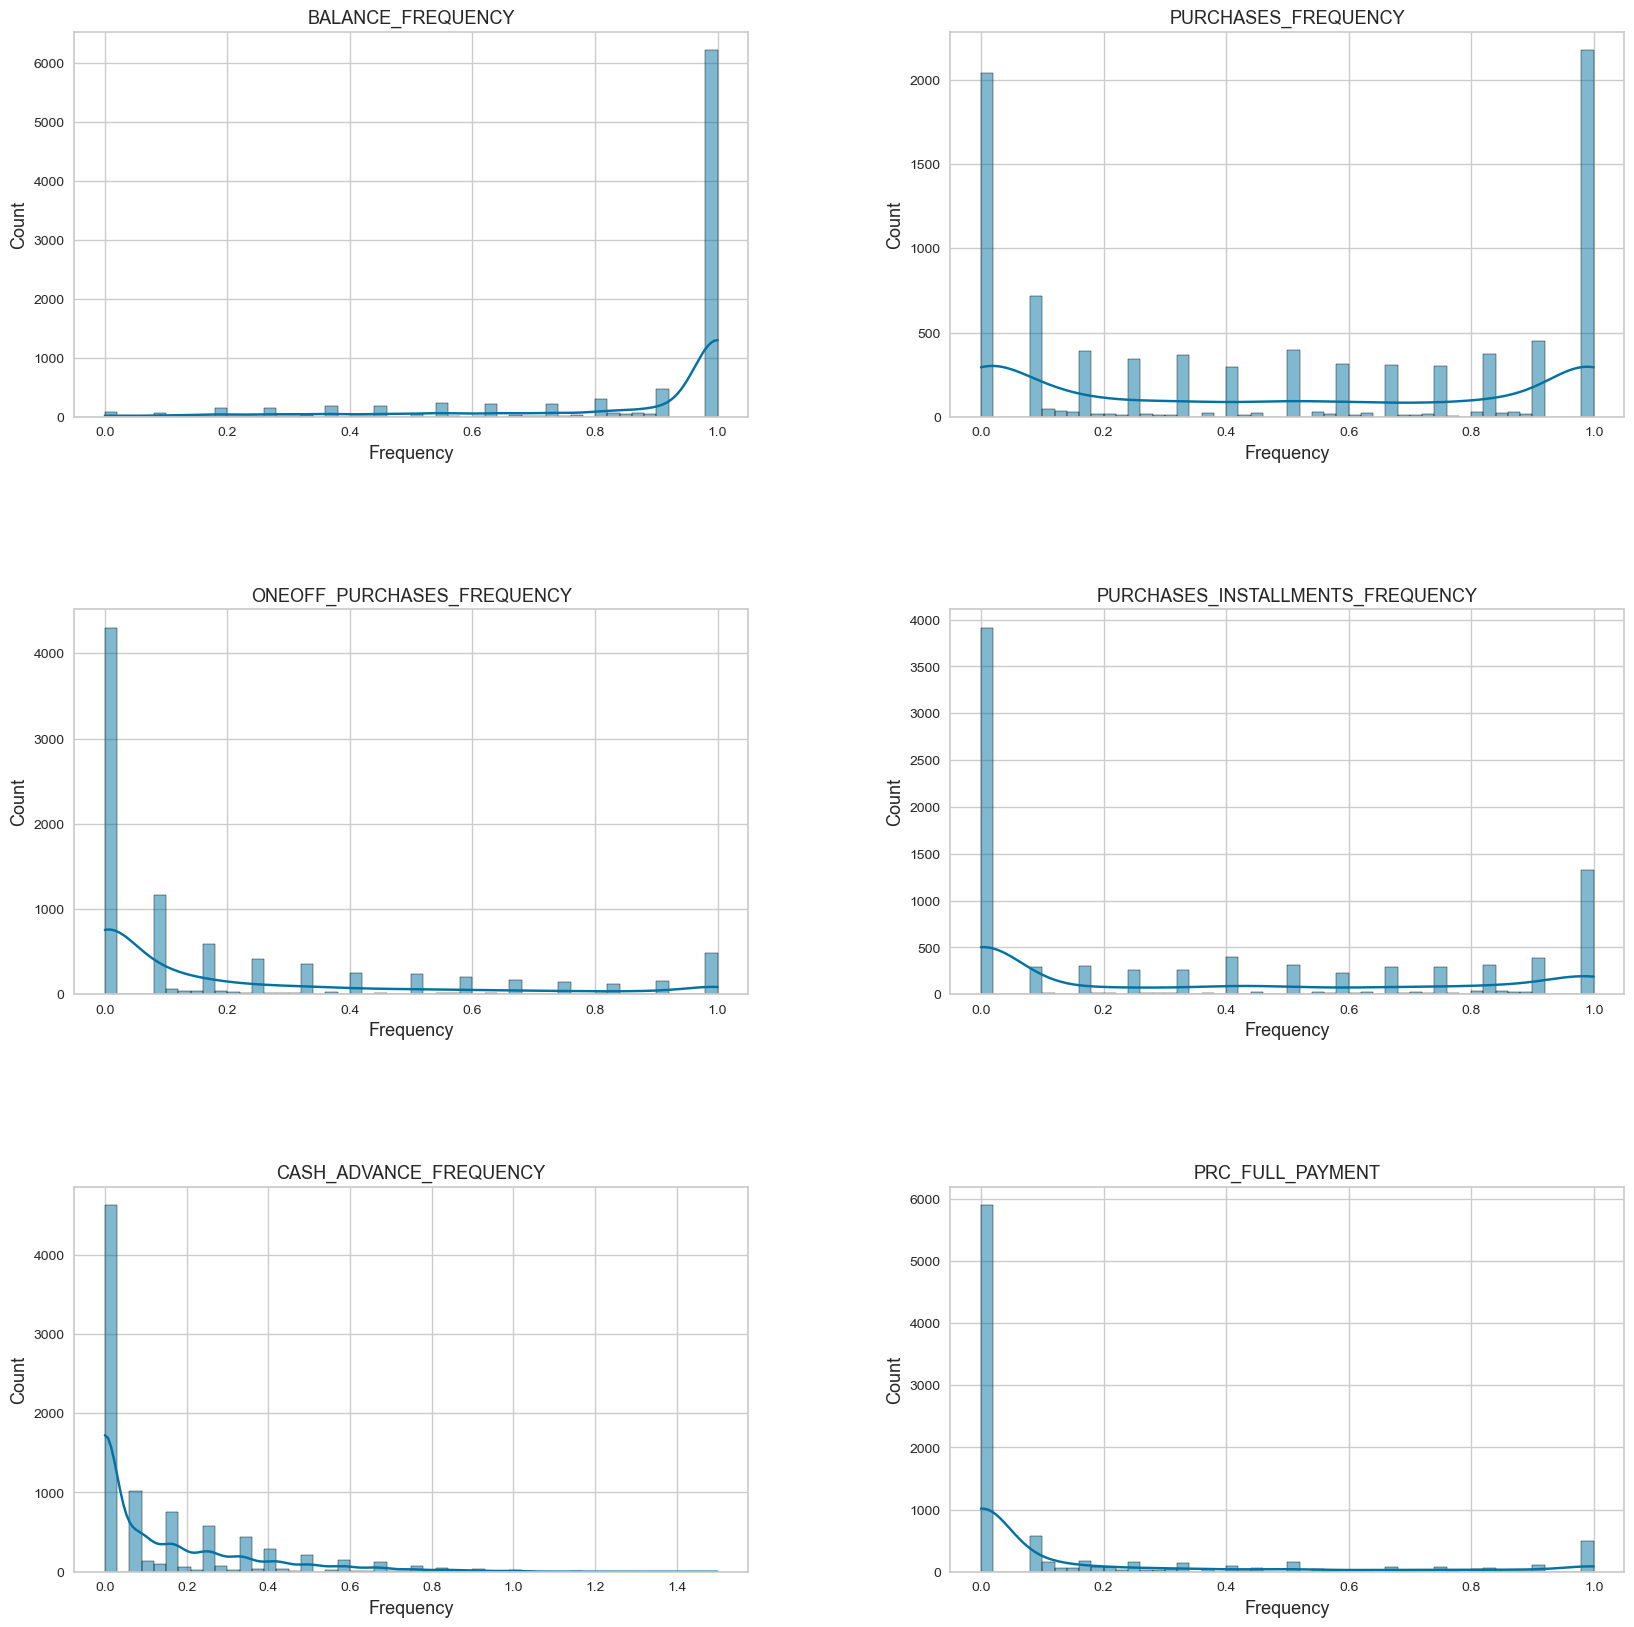

In [16]:
var_freq = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_freq):
    plt.subplot(3,2,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel('Frequency', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=50,kde=True)
    plt.savefig('variabel_frekuensi.png')

Dari hasil output pada PURCHASES_FREQUENCY memiliki frekuensi yang cukup merata antara frekuensi yang cukup sering dan tidak.Sedangkan fitur ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, PRC_FULL_PAYMENT mengalami fitur yang cukup jarang.

## Melihat distribusi data pada variable yang lain

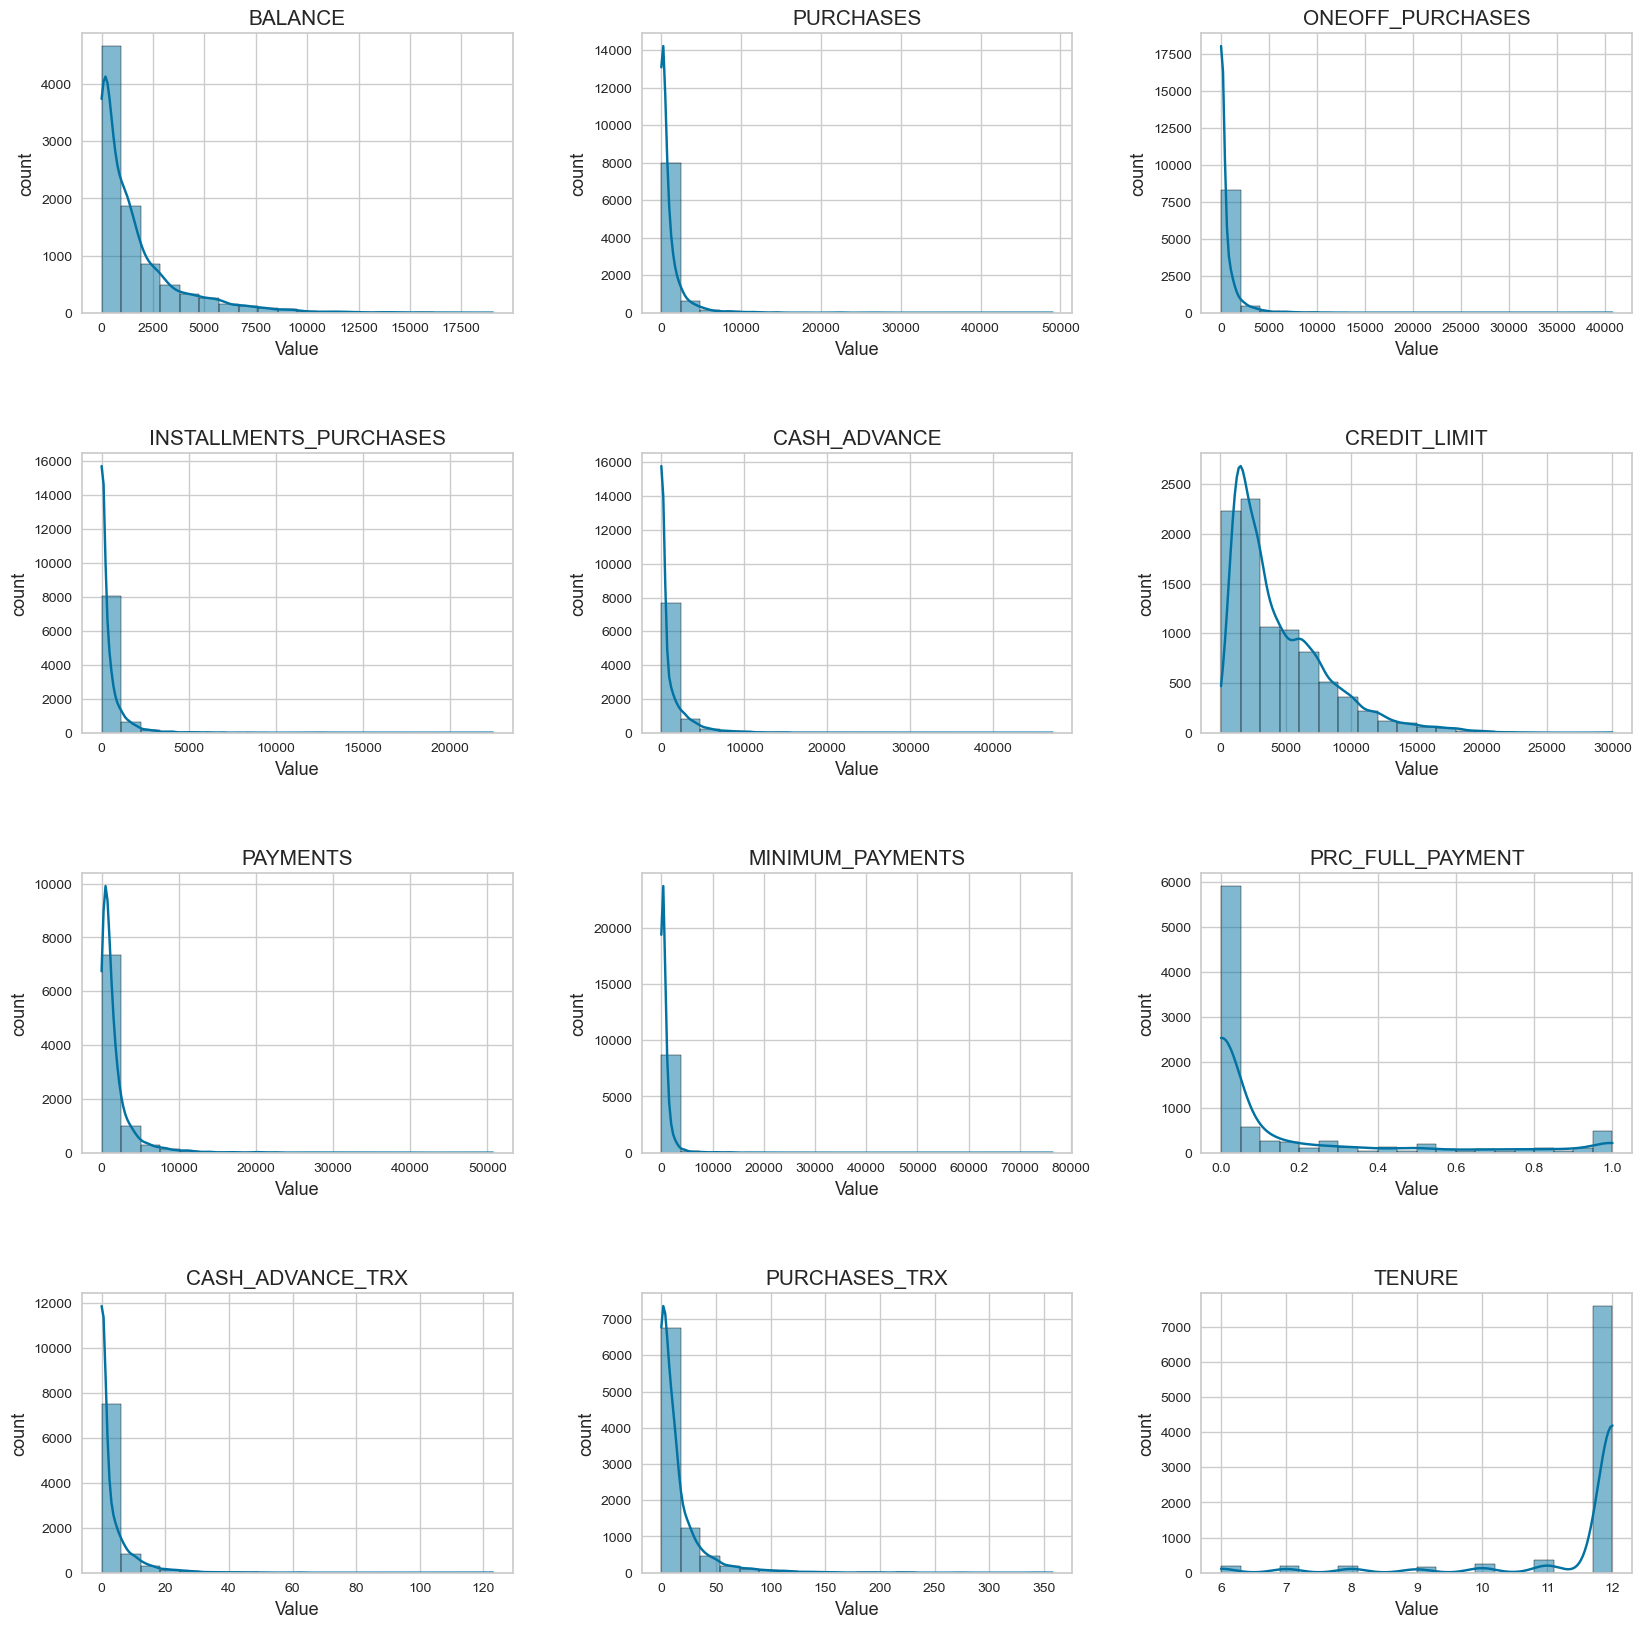

In [17]:
var_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.savefig('variabel_cek.png')

Dapat dilihat dari hasil output diatas semua fitur mempunyai distribusi tidak normal atau skewness.

In [18]:
# membuat fungsi untuk memunculkan histogram dan boxplot masing-masing kolom
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name}')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution')
    
    plt.subplot(1, 3, 3)
    feature.plot(kind = 'box')
    plt.title(f'{feature.name}')
    plt.show()

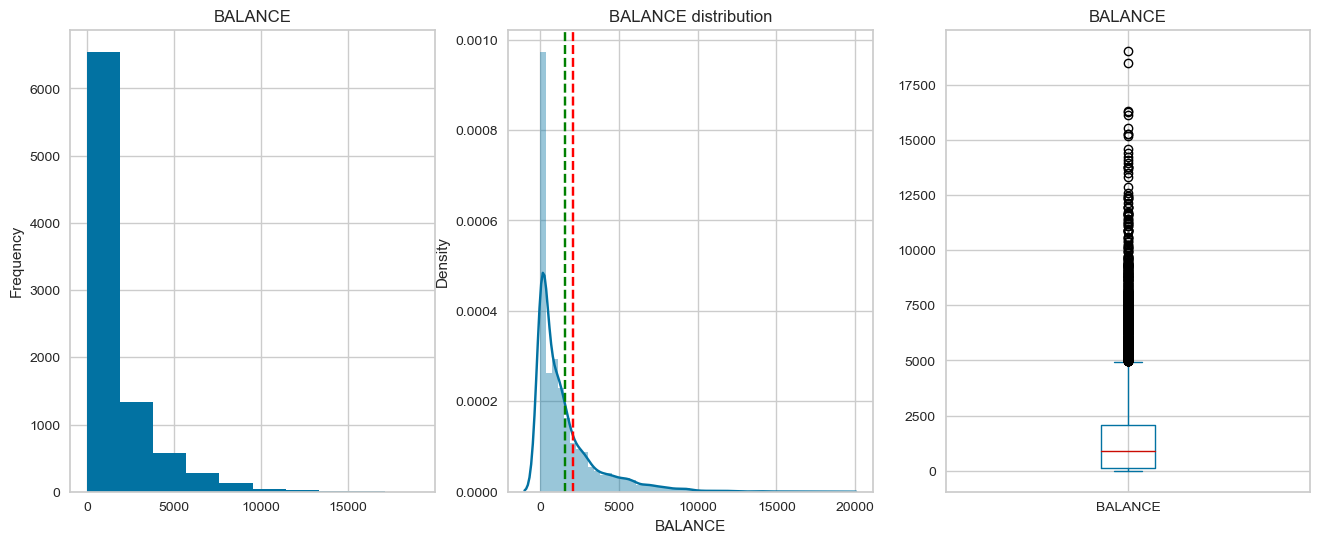

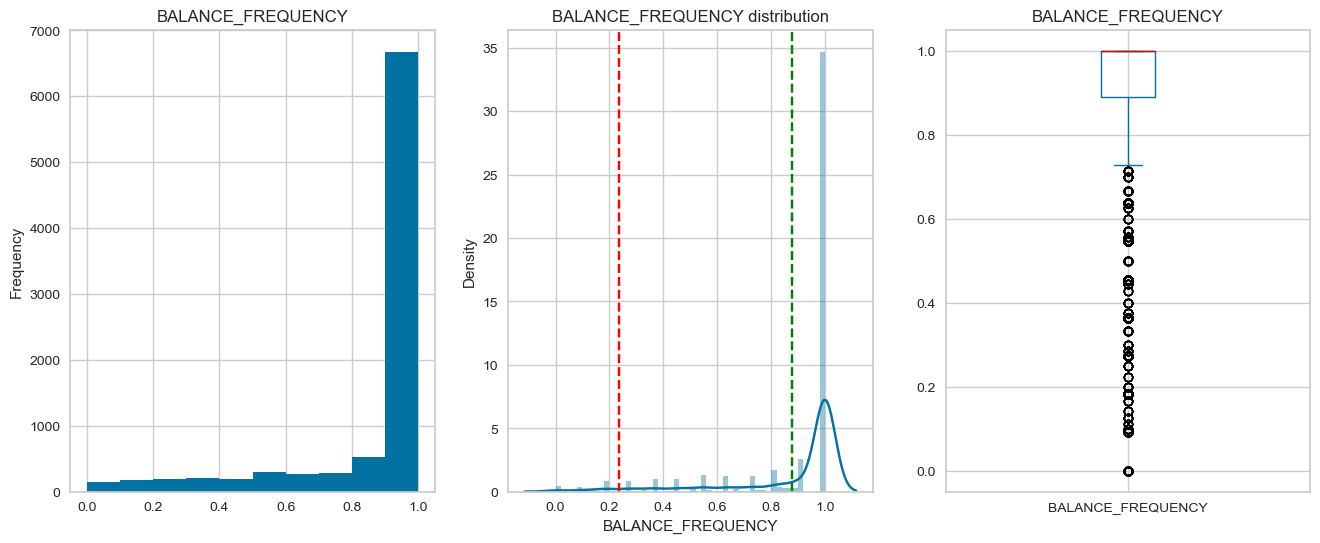

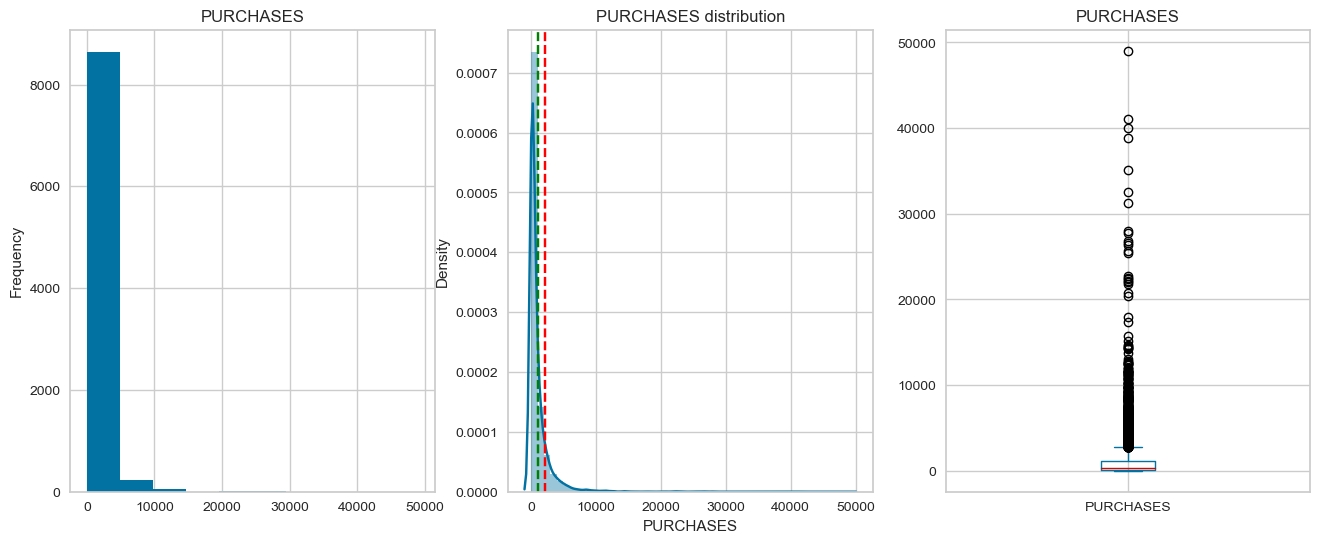

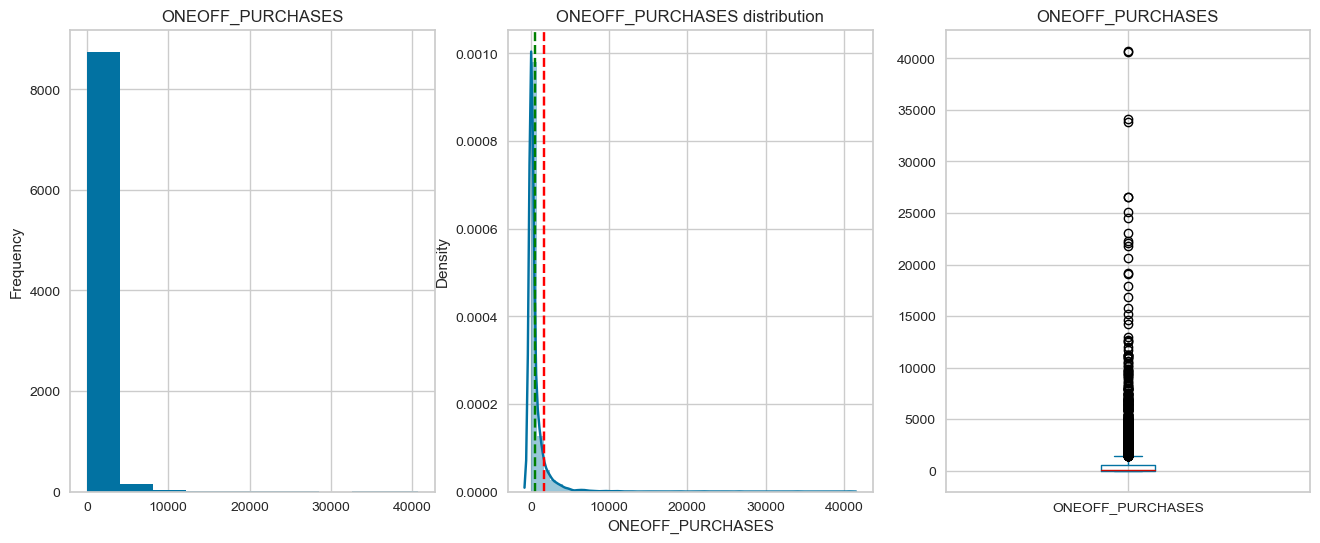

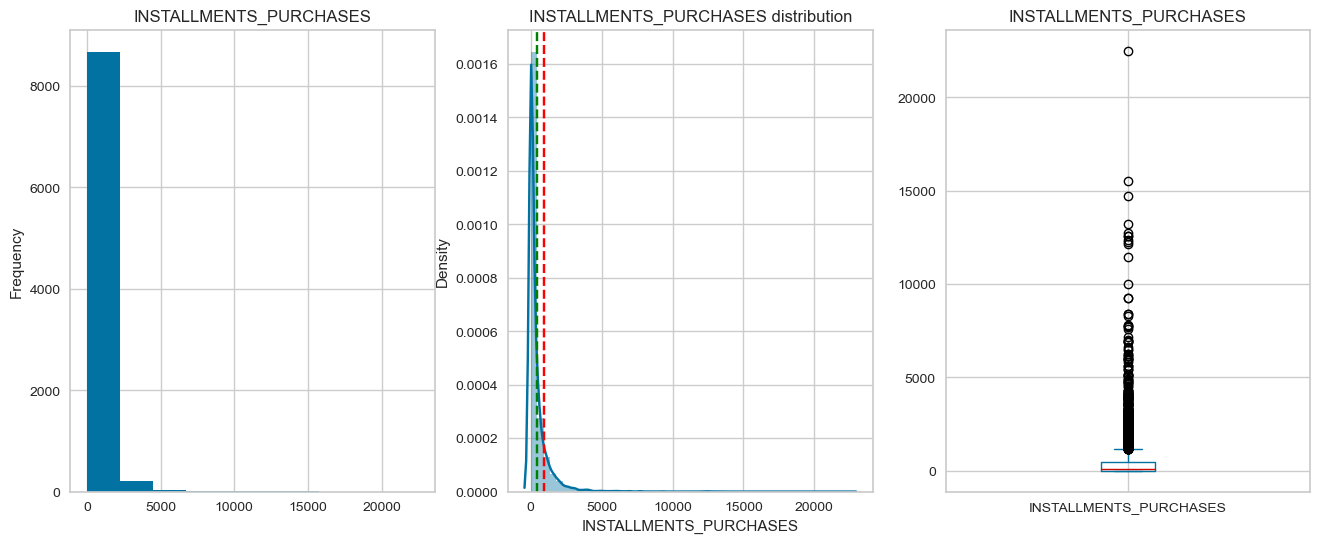

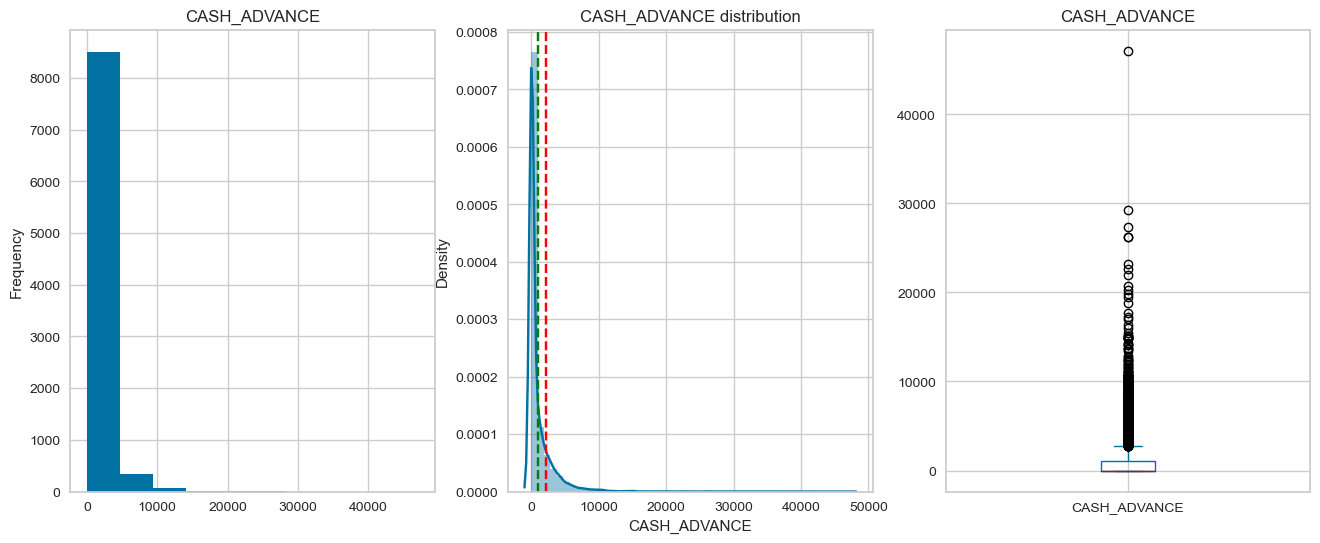

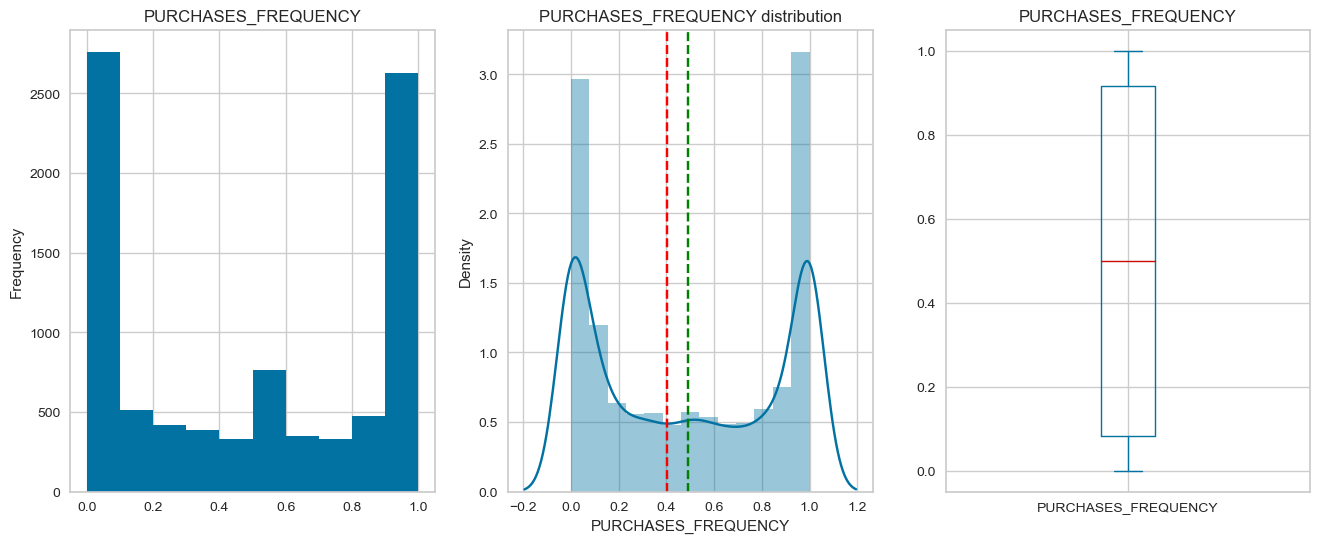

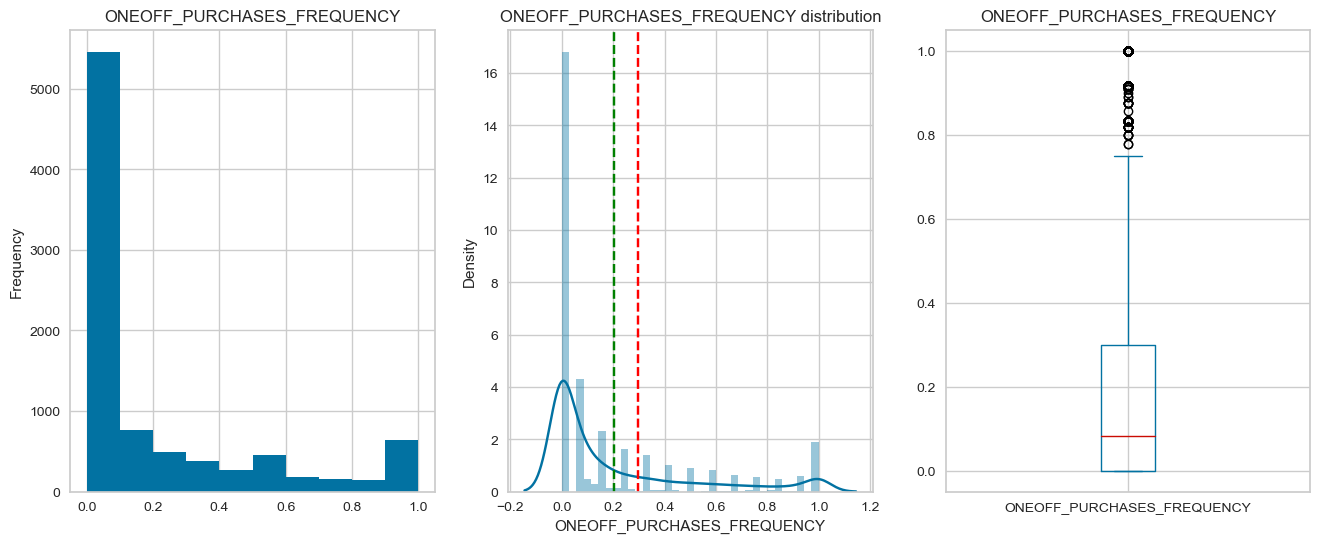

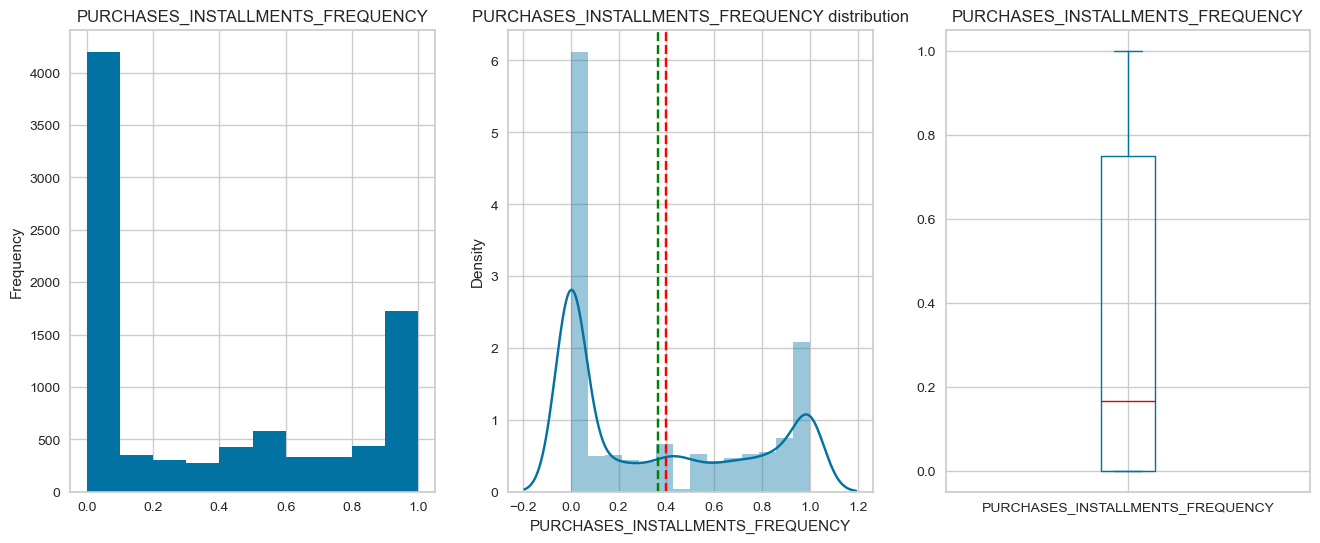

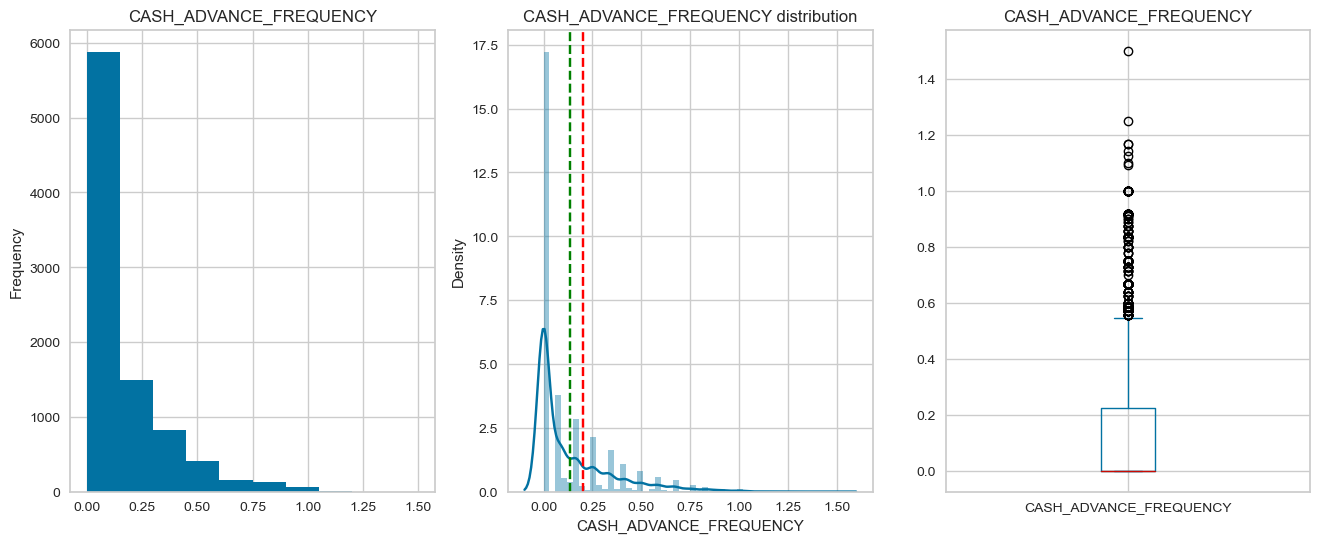

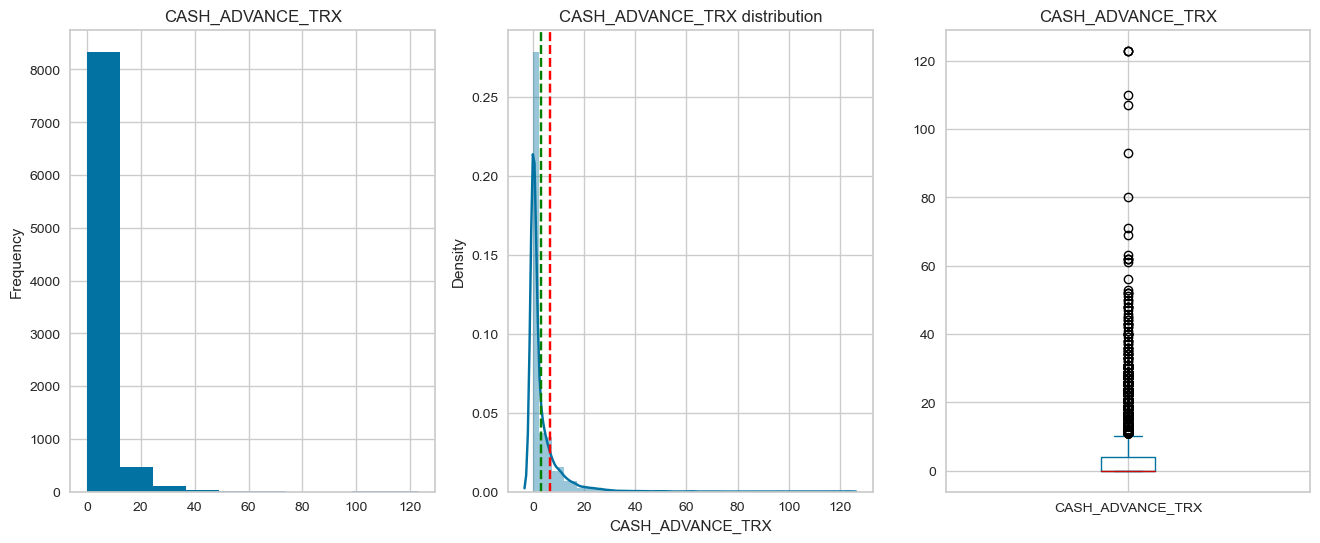

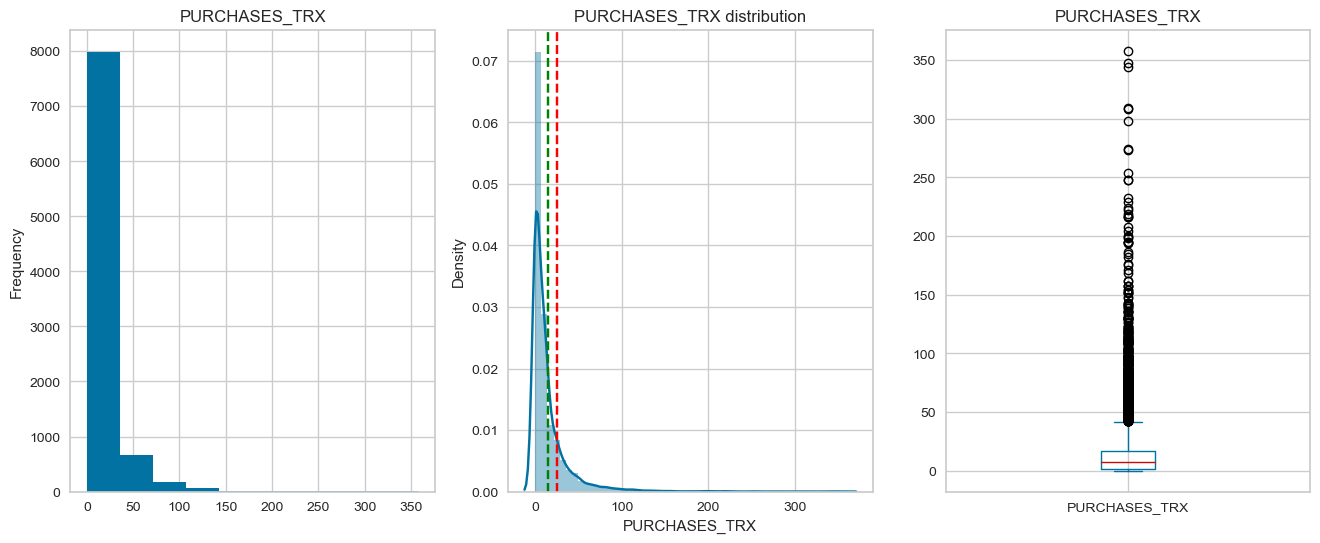

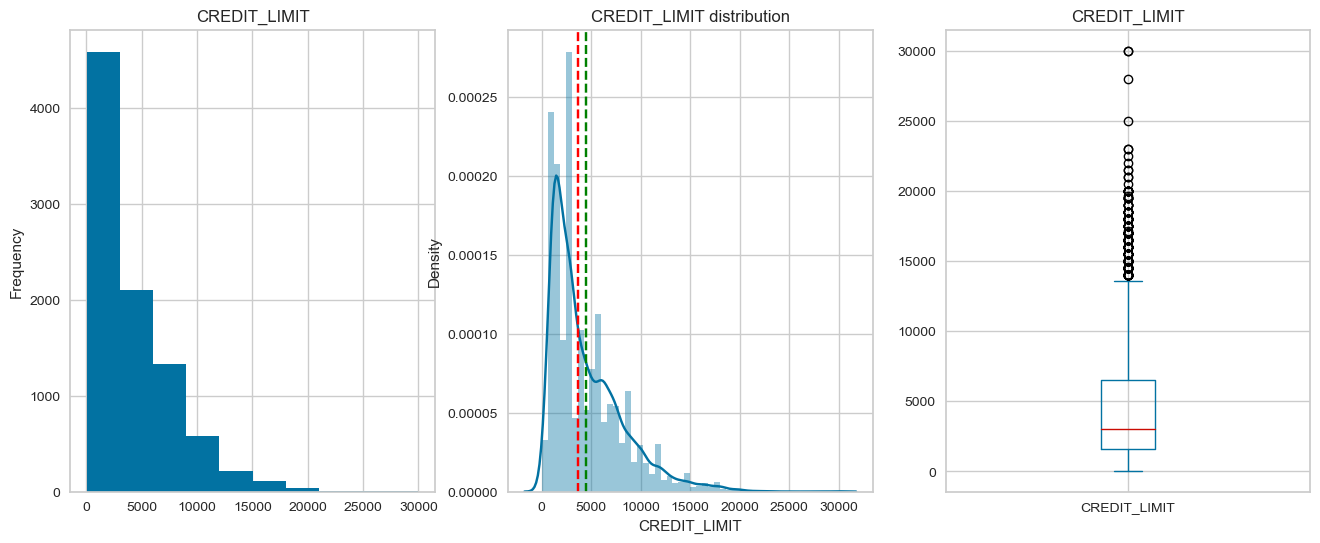

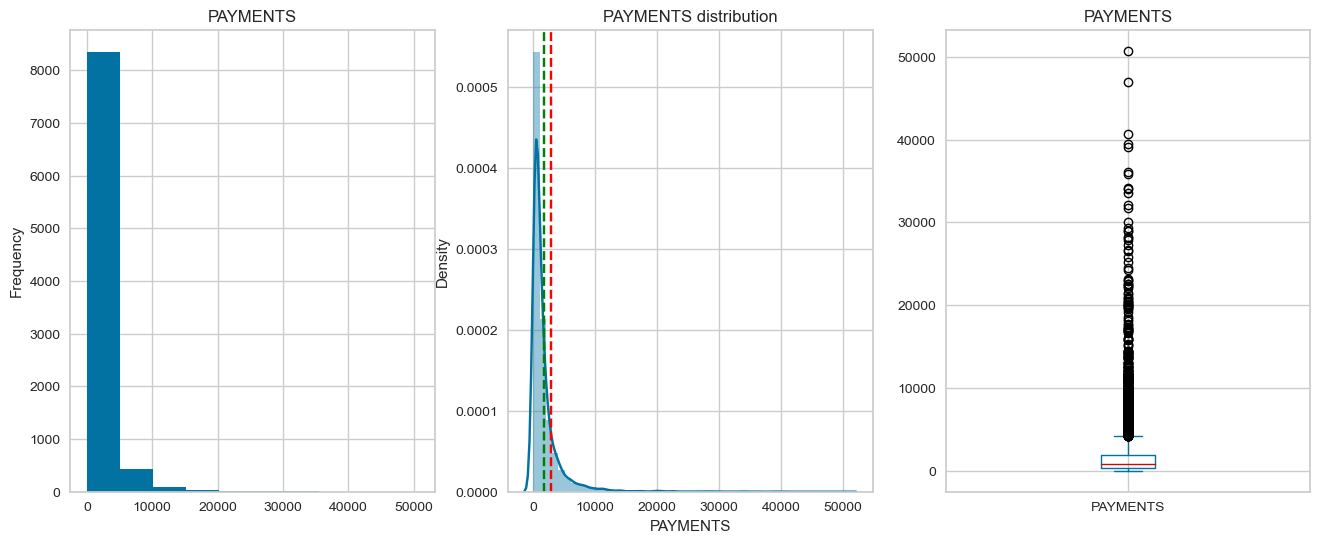

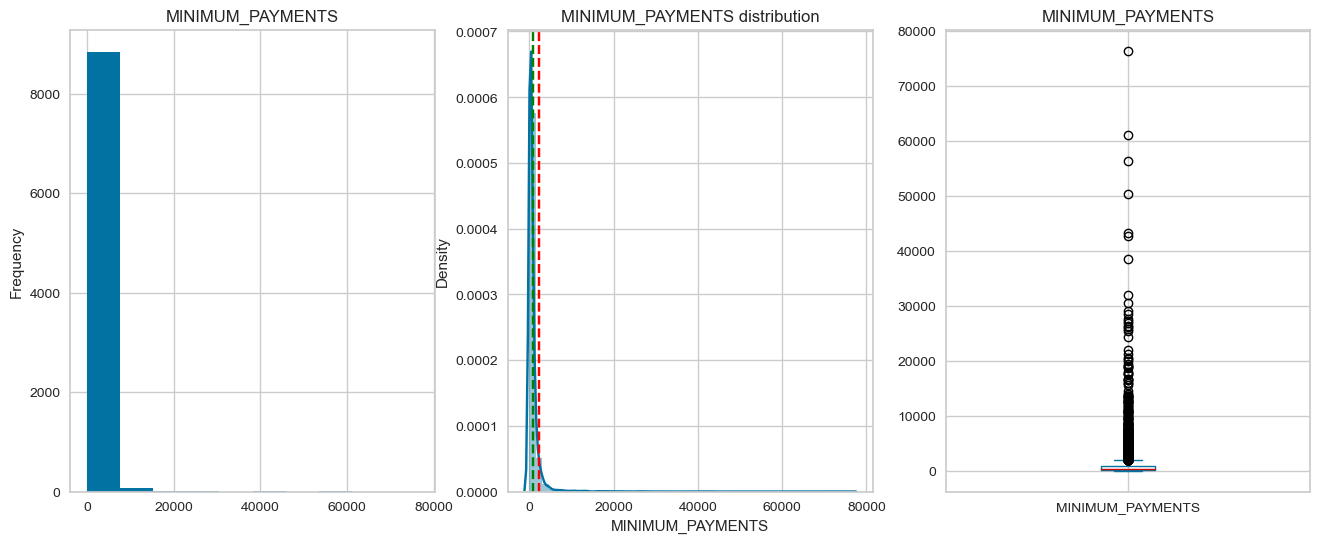

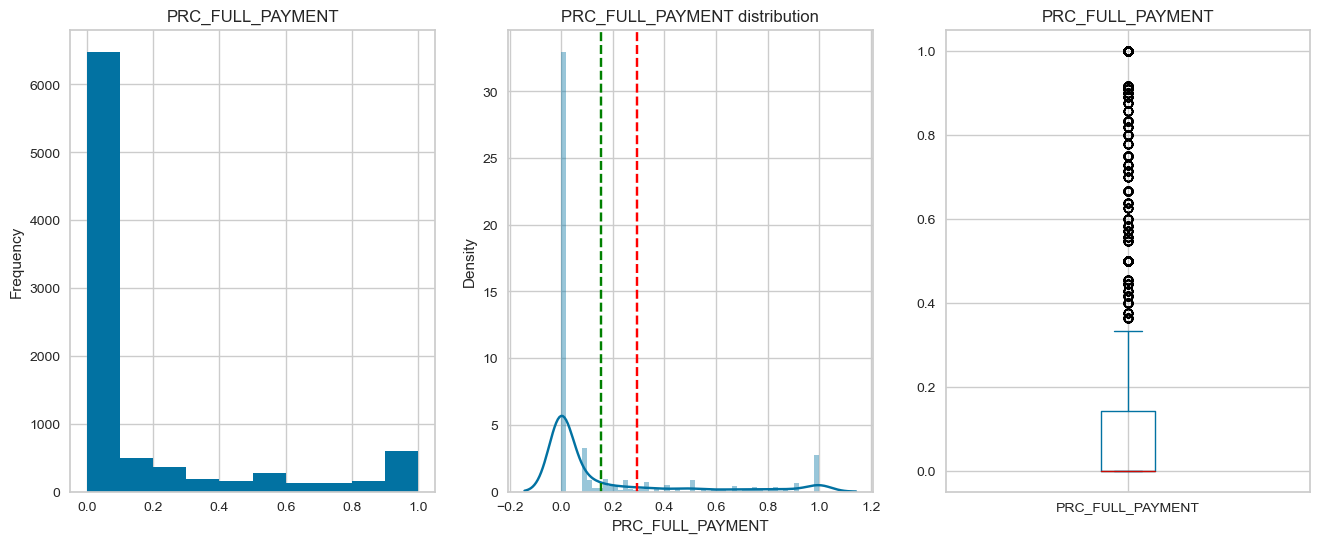

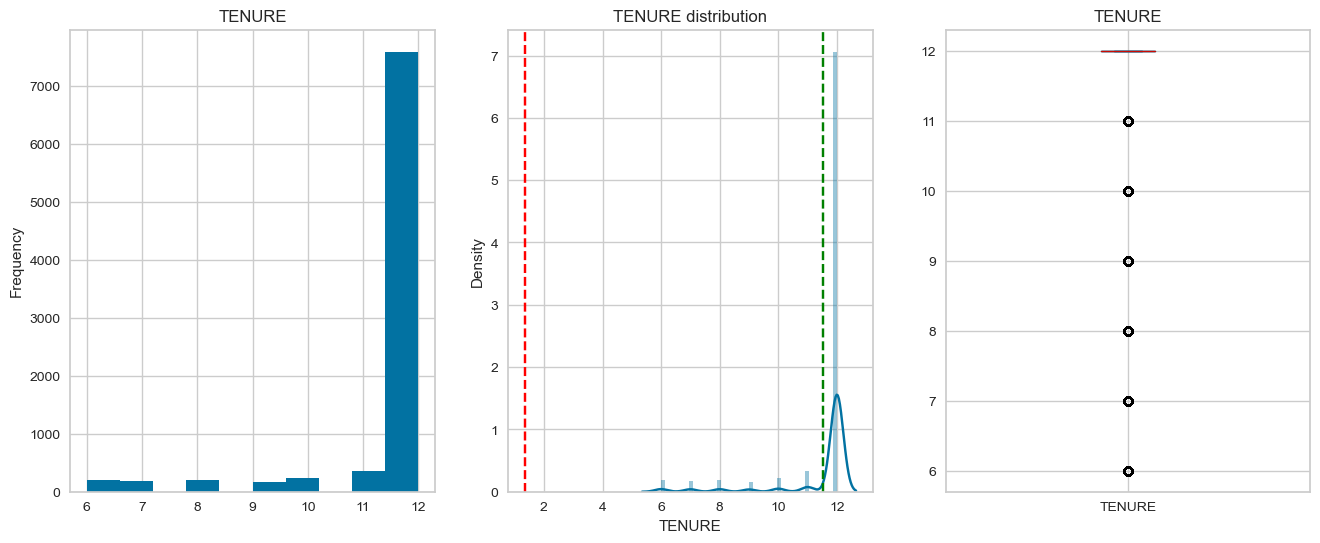

In [19]:
# memunculkan plot masing-masing kolom numerik. Kolom kategorik tidak disertakan
num_feature = df.select_dtypes(exclude='object')

for i in num_feature.columns:
    feat_plot(num_feature[i])

Berdasarkan plot distribusi dan nilai statistik deskriptif di atas, dapat diketahui bahwa selama 6 bulan penggunaan kartu kredit:

1. Pengguna kartu kredit kebanyakan memiliki saldo di bawah 2500 dengan saldo rata-rata sekitar 1500. Selain itu, saldo pengguna kartu kredit juga sering diperbarui (ditunjukkan oleh angka 1 dengan frekuensi tertinggi) ini berarti pengguna kartu kredit sering memperbarui saldo dalam kartu kredit.
2. Pengguna kartu kredit kebanyakan melakukan transaksi pembelian menggunakan kartu kredit dengan nominal di bawah 5000 dengan rata-rata nominal transaksi di sekitar 1000. Selain itu, kebanyakan pengguna melakukan transaksi dengan nominal terbanyak dalam satu kali transaksi adalah di bawah 1000. Pengguna juga kebanyakan melakukan pembelian angsuran menggunakan kartu kredit dengan nominal di bawah 5000. Ini diduga karena jumlah saldo yang kecil, maka diikuti dengan transaksi pembelian yang kecil pula.
3. Pengguna kartu kredit tidak cukup sering melakukan transaksi pembelian menggunakan kartu kredit, baik itu dalam satu kali transaksi maupun angsuran (ditunjukkan oleh plot PURCHASE_FREQUENCY, ONEOFF_PURCHASE_FREQUENCY, dan PURCHASES_INSTALLMENTS FREQUENCY).
4. Pengguna kebanyakan memiliki limit kredit di bawah 5000 dengan rata-rata 4494 dan nilai tengah 3638.
5. Pembayaran yang dilakukan pembeli kebanyakan juga di bawah nominal 5000.
6. Untuk menggunakan kartu kredit, kebanyakan pembeli harus melakukan pembayaran minimal senilai 300 (dilihat dari nilai median kolom MINIMUM_PAYMENTS).
7. Pengguna kartu kredit kebanyakan telah melakukan pembayaran 20% dari nilai pembayaran penuhnya.
8. Pengguna memiliki waktu masa pemilikan kartu kredit kebanyakan berkisar di antara 10-12 bulan.

# Pre-Processing Data

## Scaling data
Pada projek ini digunakan 3 teknik data scaler yaitu MinMax Scaler, Robust Scaler dan Standard Scaler untuk dibandingkan hasilnya dan akan dipilih teknik yang menghasilkan score paling optimal.

In [20]:
MM_scaler = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
RB_scaler = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns)
SS_scaler = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [21]:
# Score MM_Scaler
MM_scaler.describe().T

count      mean       std  min       25%  \
BALANCE                           8950.0  0.082154  0.109306  0.0  0.006736   
BALANCE_FREQUENCY                 8950.0  0.877271  0.236904  0.0  0.888889   
PURCHASES                         8950.0  0.020457  0.043570  0.0  0.000808   
ONEOFF_PURCHASES                  8950.0  0.014534  0.040722  0.0  0.000000   
INSTALLMENTS_PURCHASES            8950.0  0.018270  0.040193  0.0  0.000000   
CASH_ADVANCE                      8950.0  0.020766  0.044491  0.0  0.000000   
PURCHASES_FREQUENCY               8950.0  0.490351  0.401371  0.0  0.083333   
ONEOFF_PURCHASES_FREQUENCY        8950.0  0.202458  0.298336  0.0  0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0  0.364437  0.397448  0.0  0.000000   
CASH_ADVANCE_FREQUENCY            8950.0  0.090096  0.133414  0.0  0.000000   
CASH_ADVANCE_TRX                  8950.0  0.026413  0.055485  0.0  0.000000   
PURCHASES_TRX                     8950.0  0.041089  0.069435  0.0  0.002793   
CREDIT_LIMIT                      8950.0  0.148396  0.121490  0.0  0.051753   
PAYMENTS                          8950.0  0.034170  0.057078  0.0  0.007556   
MINIMUM_PAYMENTS                  8950.0  0.011310  0.030503  0.0  0.002236   
PRC_FULL_PAYMENT                  8950.0  0.153715  0.292499  0.0  0.000000   
TENURE                            8950.0  0.919553  0.223055  0.0  1.000000   

                                       50%       75%  max  
BALANCE                           0.045864  0.107868  1.0  
BALANCE_FREQUENCY                 1.000000  1.000000  1.0  
PURCHASES                         0.007367  0.022637  1.0  
ONEOFF_PURCHASES                  0.000932  0.014166  1.0  
INSTALLMENTS_PURCHASES            0.003956  0.020828  1.0  
CASH_ADVANCE                      0.000000  0.023629  1.0  
PURCHASES_FREQUENCY               0.500000  0.916667  1.0  
ONEOFF_PURCHASES_FREQUENCY        0.083333  0.300000  1.0  
PURCHASES_INSTALLMENTS_FREQUENCY  0.166667  0.750000  1.0  
CASH_ADVANCE_FREQUENCY            0.000000  0.148148  1.0  
CASH_ADVANCE_TRX                  0.000000  0.032520  1.0  
PURCHASES_TRX                     0.019553  0.047486  1.0  
CREDIT_LIMIT                      0.098497  0.215359  1.0  
PAYMENTS                          0.016894  0.037482  1.0  
MINIMUM_PAYMENTS                  0.004392  0.011310  1.0  
PRC_FULL_PAYMENT                  0.000000  0.142857  1.0  
TENURE                            1.000000  1.000000  1.0

In [22]:
# Score Rb_scaler
RB_scaler.describe().T

count      mean       std       min  \
BALANCE                           8950.0  0.358848  1.080833 -0.453504   
BALANCE_FREQUENCY                 8950.0 -1.104565  2.132138 -9.000009   
PURCHASES                         8950.0  0.599652  1.995932 -0.337489   
ONEOFF_PURCHASES                  8950.0  0.960223  2.874738 -0.065812   
INSTALLMENTS_PURCHASES            8950.0  0.687243  1.929718 -0.189912   
CASH_ADVANCE                      8950.0  0.878840  1.882855  0.000000   
PURCHASES_FREQUENCY               8950.0 -0.011579  0.481645 -0.600000   
ONEOFF_PURCHASES_FREQUENCY        8950.0  0.397082  0.994454 -0.277777   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0  0.263694  0.529930 -0.222223   
CASH_ADVANCE_FREQUENCY            8950.0  0.608150  0.900547  0.000000   
CASH_ADVANCE_TRX                  8950.0  0.812207  1.706162  0.000000   
PURCHASES_TRX                     8950.0  0.481865  1.553603 -0.437500   
CREDIT_LIMIT                      8950.0  0.304990  0.742574 -0.602041   
PAYMENTS                          8950.0  0.577289  1.907335 -0.564547   
MINIMUM_PAYMENTS                  8950.0  0.762355  3.361350 -0.484041   
PRC_FULL_PAYMENT                  8950.0  1.076004  2.047496  0.000000   
TENURE                            8950.0 -0.482682  1.338331 -6.000000   

                                       25%           50%       75%         max  
BALANCE                          -0.386894  2.951740e-17  0.613106    9.434627  
BALANCE_FREQUENCY                -1.000000  0.000000e+00  0.000000    0.000000  
PURCHASES                        -0.300464  2.653585e-17  0.699536   45.472693  
ONEOFF_PURCHASES                 -0.065812  0.000000e+00  0.934188   70.528052  
INSTALLMENTS_PURCHASES           -0.189912  0.000000e+00  0.810088   47.821611  
CASH_ADVANCE                      0.000000  0.000000e+00  1.000000   42.320270  
PURCHASES_FREQUENCY              -0.500000  0.000000e+00  0.500000    0.600000  
ONEOFF_PURCHASES_FREQUENCY       -0.277777  0.000000e+00  0.722223    3.055557  
PURCHASES_INSTALLMENTS_FREQUENCY -0.222223  0.000000e+00  0.777777    1.111111  
CASH_ADVANCE_FREQUENCY            0.000000  0.000000e+00  1.000000    6.750007  
CASH_ADVANCE_TRX                  0.000000  0.000000e+00  1.000000   30.750000  
PURCHASES_TRX                    -0.375000  0.000000e+00  0.625000   21.937500  
CREDIT_LIMIT                     -0.285714  0.000000e+00  0.714286    5.510204  
PAYMENTS                         -0.312035 -3.744563e-17  0.687965   32.851938  
MINIMUM_PAYMENTS                 -0.237645  0.000000e+00  0.762355  109.714720  
PRC_FULL_PAYMENT                  0.000000  0.000000e+00  1.000000    7.000007  
TENURE                            0.000000  0.000000e+00  0.000000    0.000000

In [23]:
# Score SS_scaler
SS_scaler.describe().T

count          mean       std       min  \
BALANCE                           8950.0  4.195651e-16  1.000056 -0.751640   
BALANCE_FREQUENCY                 8950.0  1.209548e-14  1.000056 -3.703271   
PURCHASES                         8950.0 -9.278518e-16  1.000056 -0.469552   
ONEOFF_PURCHASES                  8950.0  3.916048e-15  1.000056 -0.356934   
INSTALLMENTS_PURCHASES            8950.0  2.275424e-15  1.000056 -0.454576   
CASH_ADVANCE                      8950.0  5.697020e-15  1.000056 -0.466786   
PURCHASES_FREQUENCY               8950.0 -3.716084e-16  1.000056 -1.221758   
ONEOFF_PURCHASES_FREQUENCY        8950.0  2.021052e-15  1.000056 -0.678661   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0  2.353921e-16  1.000056 -0.916995   
CASH_ADVANCE_FREQUENCY            8950.0  5.856519e-16  1.000056 -0.675349   
CASH_ADVANCE_TRX                  8950.0 -7.151821e-16  1.000056 -0.476070   
PURCHASES_TRX                     8950.0 -3.570713e-15  1.000056 -0.591796   
CREDIT_LIMIT                      8950.0 -5.142466e-15  1.000056 -1.221536   
PAYMENTS                          8950.0 -3.264056e-16  1.000056 -0.598688   
MINIMUM_PAYMENTS                  8950.0  1.873114e-17  1.000056 -0.370823   
PRC_FULL_PAYMENT                  8950.0 -2.199184e-15  1.000056 -0.525551   
TENURE                            8950.0  1.556446e-14  1.000056 -4.122768   

                                       25%       50%           75%        max  
BALANCE                          -0.690008 -0.332029  2.352559e-01   8.397489  
BALANCE_FREQUENCY                 0.049045  0.518084  5.180838e-01   0.518084  
PURCHASES                        -0.451001 -0.300454  5.004652e-02  22.483510  
ONEOFF_PURCHASES                 -0.356934 -0.334040 -9.056763e-03  24.201066  
INSTALLMENTS_PURCHASES           -0.454576 -0.356156  6.366321e-02  24.426889  
CASH_ADVANCE                     -0.466786 -0.466786  6.435242e-02  22.011117  
PURCHASES_FREQUENCY              -1.014125  0.024043  1.062211e+00   1.269843  
ONEOFF_PURCHASES_FREQUENCY       -0.678661 -0.399319  3.269728e-01   2.673451  
PURCHASES_INSTALLMENTS_FREQUENCY -0.916995 -0.497629  9.701506e-01   1.599199  
CASH_ADVANCE_FREQUENCY           -0.675349 -0.675349  4.351492e-01   6.820521  
CASH_ADVANCE_TRX                 -0.476070 -0.476070  1.100739e-01  17.547848  
PURCHASES_TRX                    -0.551565 -0.310177  9.213645e-02  13.811014  
CREDIT_LIMIT                     -0.795526 -0.410743  5.512163e-01   7.010083  
PAYMENTS                         -0.466291 -0.302685  5.802976e-02  16.922279  
MINIMUM_PAYMENTS                 -0.297516 -0.226813 -4.390474e-16  32.415090  
PRC_FULL_PAYMENT                 -0.525551 -0.525551 -3.712234e-02   2.893453  
TENURE                            0.360680  0.360680  3.606795e-01   0.360680

## Reduksi Dimensi menggunakan PCA
Set parameter n_components = 0.9, yang berarti bahwa PCA secara otomatis akan menghasilkan cukup banyak principal component yang akan mempertahankan 90% varians dalam dataset.

In [24]:
pca = PCA(n_components=0.9, random_state=42)
pca_MM = pca.fit(MM_scaler)
pc_MM = ['PC'+str(n) for n in range(1, len(pca_MM.components_)+1)]
df_pca_MM = pd.DataFrame(pca_MM.transform(MM_scaler), columns=pc_MM)

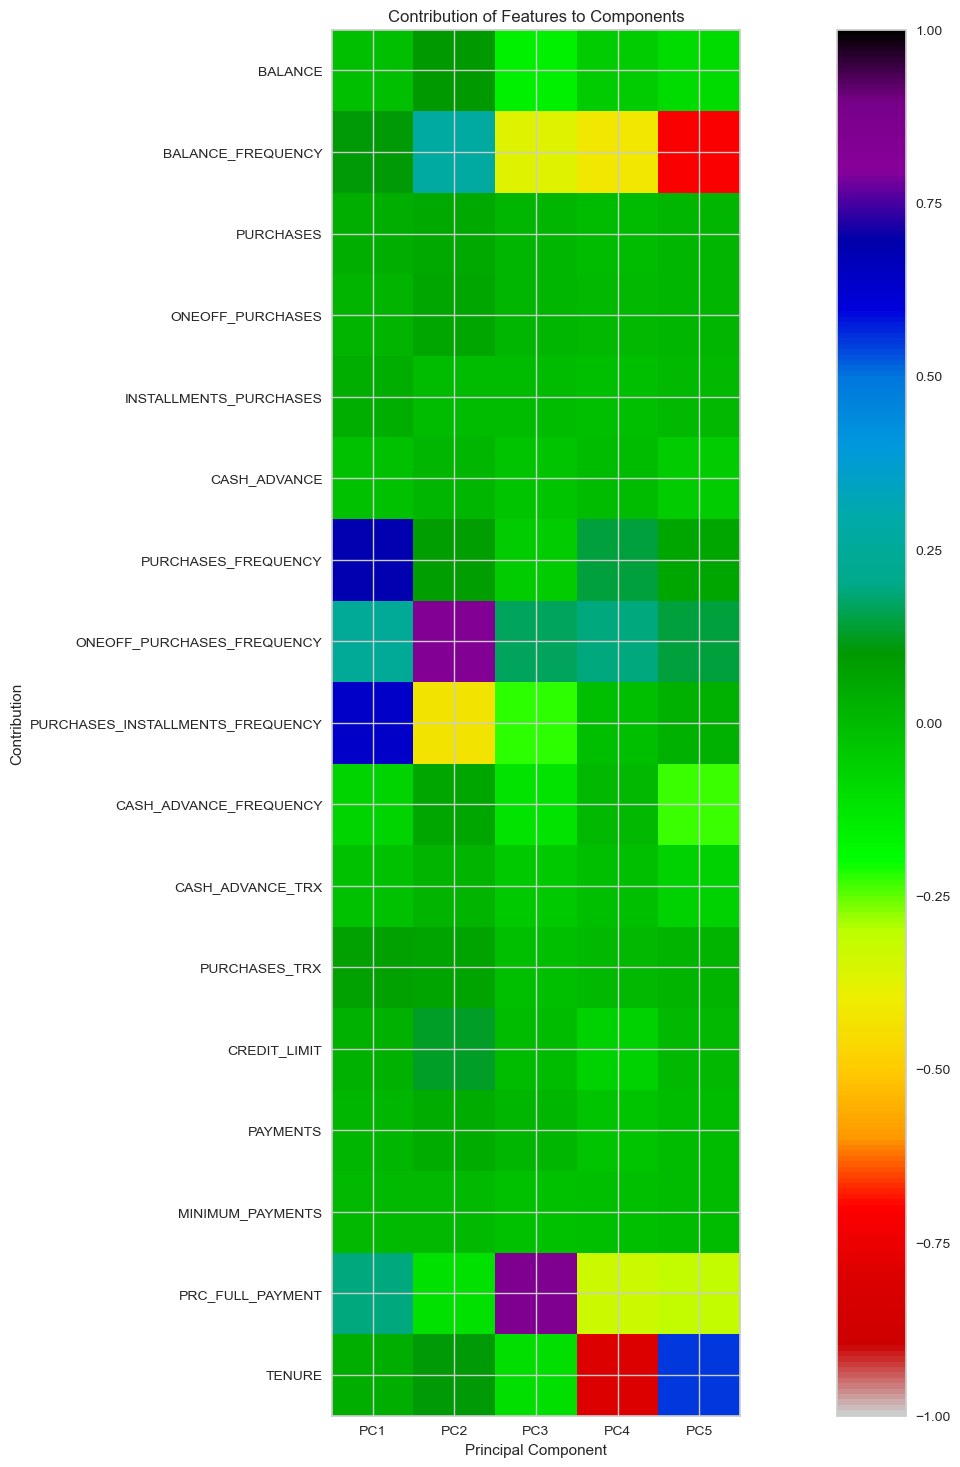

In [25]:
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca_MM.components_.T,
           cmap="nipy_spectral_r",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(MM_scaler.columns)), MM_scaler.columns)
plt.xticks(range(len(df_pca_MM.columns)), df_pca_MM.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

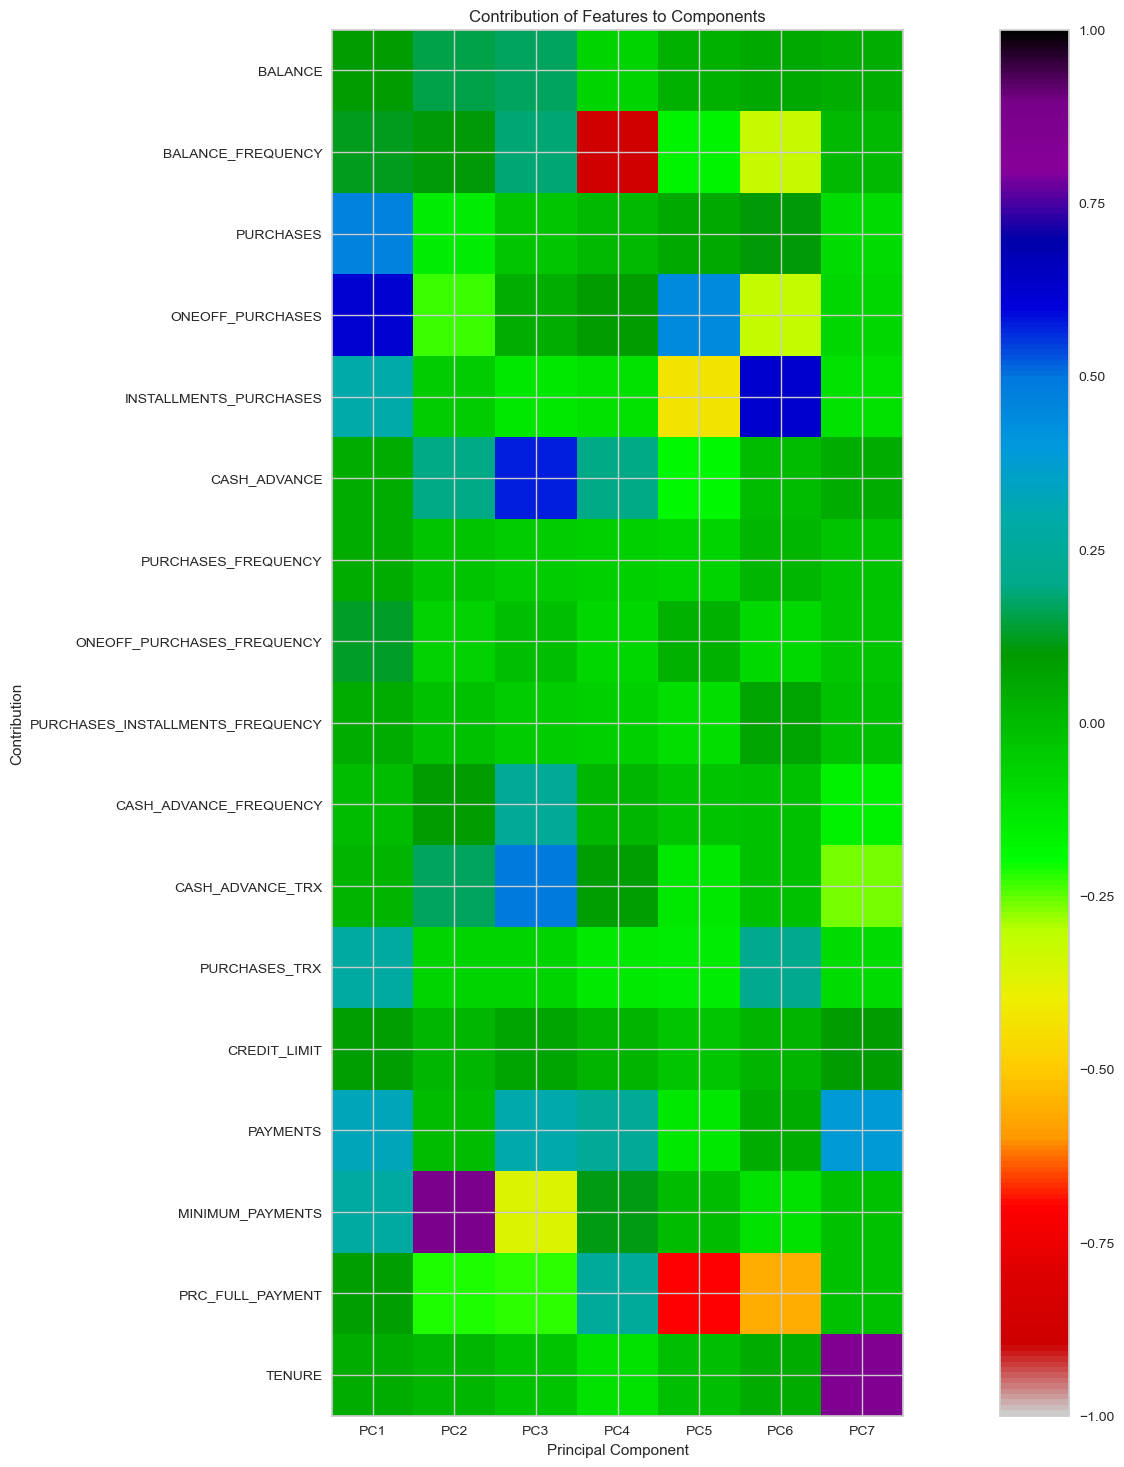

In [26]:
pca_RB = pca.fit(RB_scaler)
pc_RB = ['PC'+str(n) for n in range(1, len(pca_RB.components_)+1)]
df_pca_RB = pd.DataFrame(pca_RB.transform(RB_scaler), columns=pc_RB)
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca_RB.components_.T,
           cmap="nipy_spectral_r",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(RB_scaler.columns)), RB_scaler.columns)
plt.xticks(range(len(df_pca_RB.columns)), df_pca_RB.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

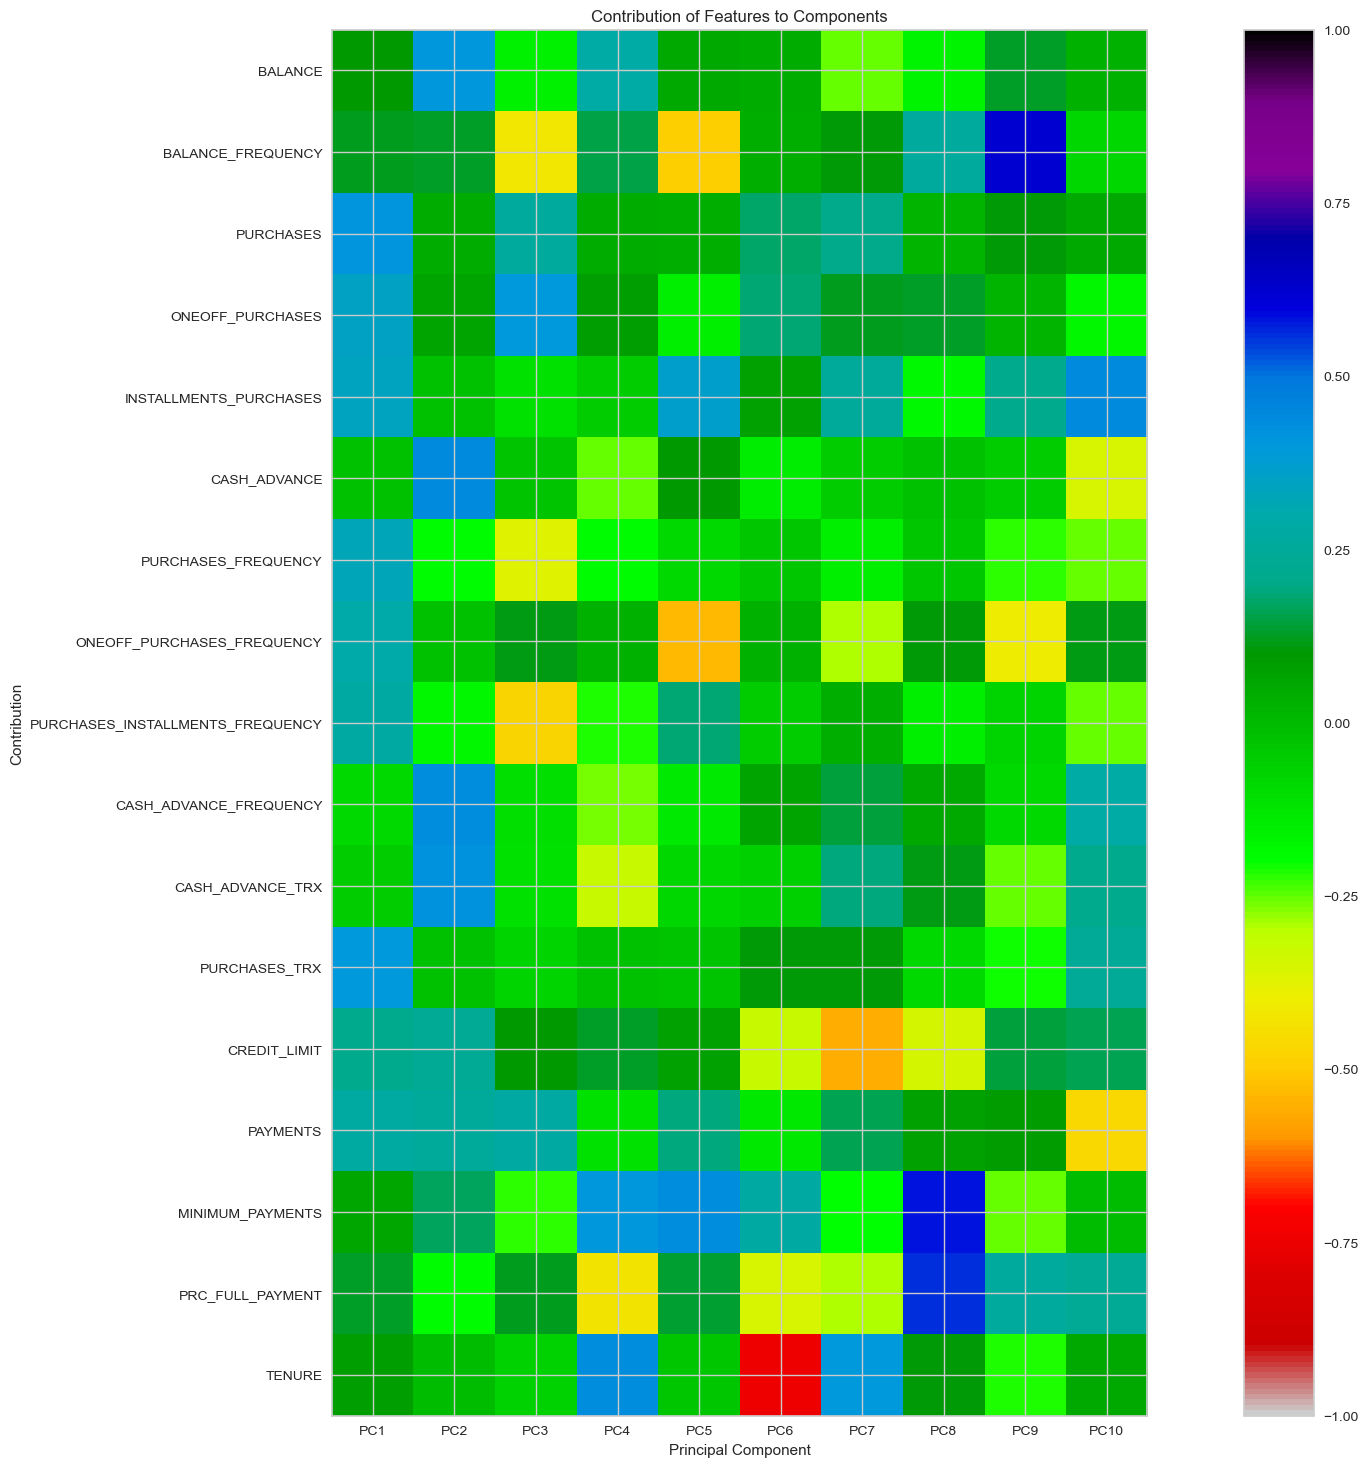

In [27]:
pca_SS = pca.fit(SS_scaler)
pc_SS = ['PC'+str(n) for n in range(1, len(pca_SS.components_)+1)]
df_pca_SS = pd.DataFrame(pca_SS.transform(SS_scaler), columns=pc_SS)
fig, ax = plt.subplots(figsize=(25, 18))
plt.imshow(pca_SS.components_.T,
           cmap="nipy_spectral_r",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(SS_scaler.columns)), SS_scaler.columns)
plt.xticks(range(len(df_pca_SS.columns)), df_pca_SS.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

# Clustering
Menemukan parameter n_clusters menggunakan metode elbow

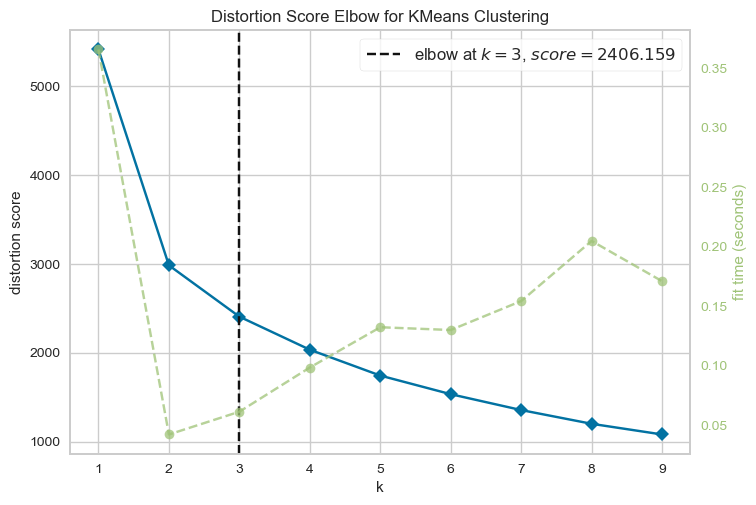

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
model = KMeans(random_state=42)
visualizer_MM = KElbowVisualizer(model, k=(1,10))
visualizer_MM.fit(df_pca_MM)
visualizer_MM.show()

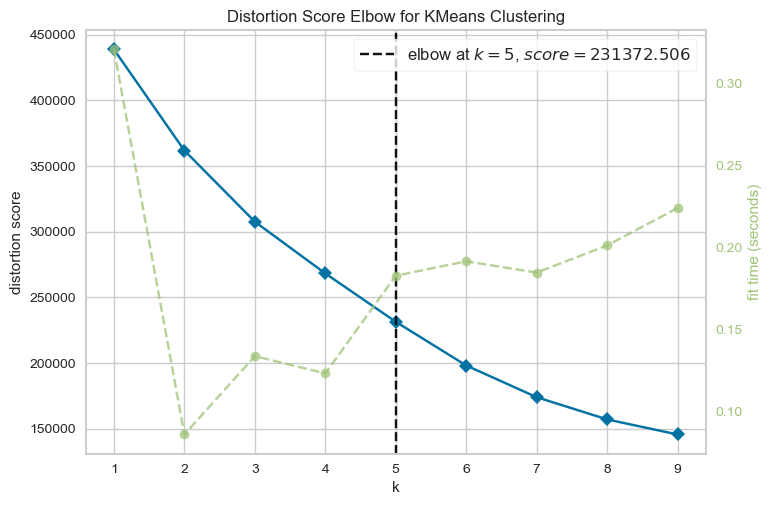

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# elbow Method using RobustScaler dataframe
visualizer_RB = KElbowVisualizer(model, k=(1,10))
visualizer_RB.fit(df_pca_RB)
visualizer_RB.show()

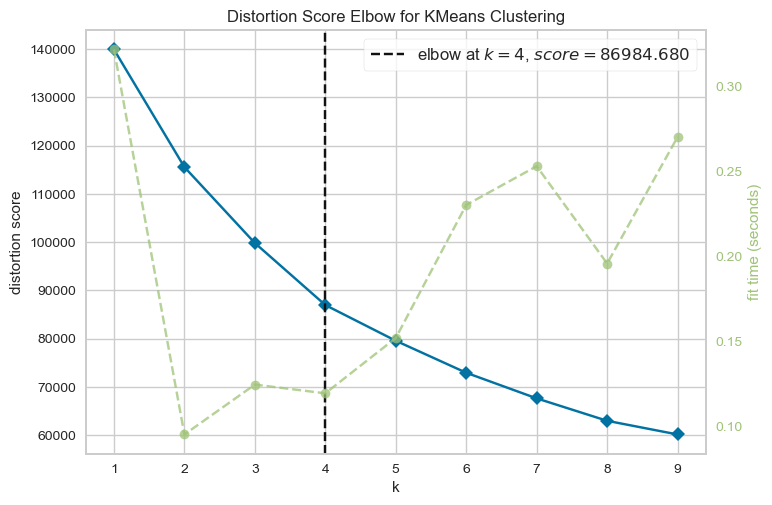

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Elbow Method using StandardScaler dataframe
visualizer_SS = KElbowVisualizer(model, k=(1,10))
visualizer_SS.fit(df_pca_SS)
visualizer_SS.show()

Dari hasil visualisasi diatas masing masing akan dilakukan percobaan dengan nilai k yang berbeda untuk mendapatkan hasil cluster yang optimal

In [31]:
# create model Kmeans using dataframe Minmaxscaler
model_Kmeans_MM = KMeans(visualizer_MM.elbow_value_, random_state=42)
labels_MM = model_Kmeans_MM.fit_predict(df_pca_MM)

In [32]:
# create model Kmeans using dataframe Robustscaler
model_Kmeans_RB = KMeans(visualizer_RB.elbow_value_, random_state=42)
labels_RB = model_Kmeans_RB.fit_predict(df_pca_RB)

In [33]:
# create model Kmeans using dataframe Standardscaler
model_Kmeans_SS = KMeans(visualizer_SS.elbow_value_, random_state=42)
labels_SS = model_Kmeans_SS.fit_predict(df_pca_SS)

In [34]:
MM_scaler['LABELS'] = labels_MM
df_pca_MM['LABELS'] = labels_MM

RB_scaler['LABELS'] = labels_RB
df_pca_RB['LABELS'] = labels_RB

SS_scaler['LABELS'] = labels_SS
df_pca_SS['LABELS'] = labels_SS

## Clustering dengan Silhouette

In [49]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

print("Data asli:")
print(df.shape)
print("\nData setelah di-scaling:")
print(scaled.shape)

Data asli:
(8950, 17)

Data setelah di-scaling:
(8950, 17)


In [51]:
# Statistics of scaled data
scaled_data = pd.DataFrame(scaled, columns=df.columns)
scaled_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.573963          0.110074      -0.591796      0.688639   
2               -0.675349         -0.476070      -0.109020      0.826062   
3               -0.258913         -0.329534      -0.551565      0.826062   
4               -0.675349         -0.476070      -0.551565     -0.905464   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979     -3.109675e-01         -0.525551  0.36068  
1  0.818642      8.931021e-02          0.234227  0.36068  
2 -0.383805     -1.016632e-01         -0.525551  0.36068  
3 -0.598688     -4.390474e-16         -0.525551  0.36068  
4 -0.364368     -2.657913e-01         -0.525551  0.36068

In [44]:
from sklearn.metrics import silhouette_score

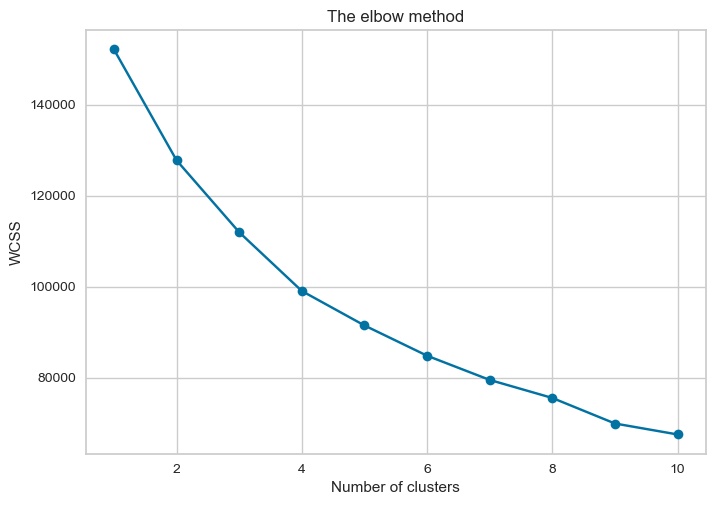

In [52]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2, 8):
    km = KMeans(n_clusters=i, random_state=0)
    labels = km.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print("Silhouette score for", i, "clusters:", score)

Silhouette score for 2 clusters: 0.20950134853896507
Silhouette score for 3 clusters: 0.24996085627555273
Silhouette score for 4 clusters: 0.1976074492720698
Silhouette score for 5 clusters: 0.19323261884327353
Silhouette score for 6 clusters: 0.20259398485856095
Silhouette score for 7 clusters: 0.21501415862714268


In [54]:
x = scaled_data.values
km = KMeans(n_clusters=3, random_state=42)
y_km = km.fit_predict(x)

In [55]:
y_km

array([0, 1, 0, ..., 0, 0, 0])

In [56]:
df_kmean= scaled_data.copy()
df_kmean['KMeansSegment']= km.labels_

In [57]:
df_kmean

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960433   
1                   0.573963          0.110074      -0.591796      0.688639   
2                  -0.675349         -0.476070      -0.109020      0.826062   
3                  -0.258913         -0.329534      -0.551565      0.826062   
4                  -0.675349         -0.476070      -0.551565     -0.905464   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960433   
8946               -0.675349         -0.476070      -0.350408     -0.960433   
8947               -0.675349         -0.476070      -0.390639     -0.960433   
8948                0.157527         -0.182998      -0.591796     -1.097856   
8949                0.990398         -0.182998       0.333524     -0.905464   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  KMeansSegment  
0    -0.528979     -3.109675e-01         -0.525551  0.360680              0  
1     0.818642      8.931021e-02          0.234227  0.360680              1  
2    -0.383805     -1.016632e-01         -0.525551  0.360680              0  
3    -0.598688     -4.390474e-16         -0.525551  0.360680              0  
4    -0.364368     -2.657913e-01         -0.525551  0.360680              0  
...        ...               ...               ...       ...            ...  
8945 -0.486217     -3.498541e-01          1.183951 -4.122768             

In [64]:
df_kmean['Labels'] = df_kmean['KMeansSegment'].map({0:'Limit kredit pengguna rendah & Pengguna jarang memperbaharui isi saldo',
                                                 1:'Limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo',
                                                    2:'Limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo'})
df_kmean.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.573963          0.110074      -0.591796      0.688639   
2               -0.675349         -0.476070      -0.109020      0.826062   
3               -0.258913         -0.329534      -0.551565      0.826062   
4               -0.675349         -0.476070      -0.551565     -0.905464   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  KMeansSegment  \
0 -0.528979     -3.109675e-01         -0.525551  0.36068              0   
1  0.818642      8.931021e-02          0.234227  0.36068              1   
2 -0.383805     -1.016632e-01         -0.525551  0.36068              0   
3 -0.598688     -4.390474e-16         -0.525551  0.36068              0   
4 -0.364368     -2.657913e-01         -0.525551  0.36068              0   

                                              Labels  
0  Limit kredit pengguna rendah & Pengguna jarang...  
1  Limit kredit pengguna rata-rata & pengguna cuk...  
2  Limit kredit pengguna rendah & Pengguna jarang...  
3  Limit kredit pengguna rendah & Pengguna jarang...  
4  Limit kredit pengguna rendah & Pengguna jarang...

In [65]:
# Melihat persentase dari masing-masing klaster
clust = pd.DataFrame({"Klaster":(df_kmean['Labels'].unique()),
                        "Percent":(df_kmean['Labels'].value_counts()/df_kmean.shape[0])*100}).reset_index()

In [66]:
clust.drop(['index'],axis=1)

Klaster    Percent
0  Limit kredit pengguna rendah & Pengguna jarang...  68.357542
1  Limit kredit pengguna rata-rata & pengguna cuk...  17.843575
2  Limit kredit pengguna pengguna tinggi & penggu...  13.798883

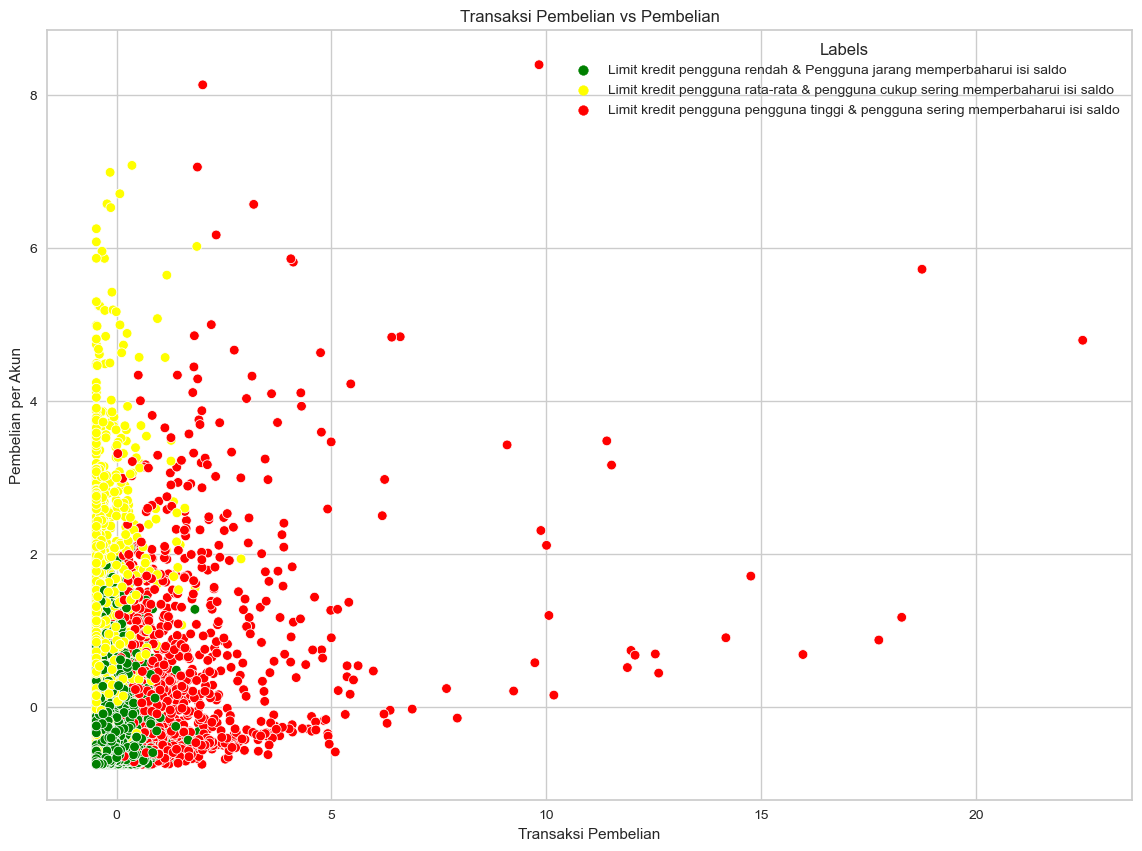

<Figure size 800x550 with 0 Axes>

In [69]:
plt.figure(figsize=(14, 10))
X = df_kmean['PURCHASES']
Y = df_kmean['BALANCE']
g = sns.scatterplot(x=X, y=Y, hue=df_kmean['Labels'], palette=['green', 'yellow', 'red'])
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian per Akun')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

plt.savefig("Transaksi Pembelian vs Pembelian KMeans.png",
            bbox_inches="tight",
            pad_inches=1,
            transparent=True,
            orientation='landscape')

- Kuning (Cluster 0) : limit kredit pengguna rendah & pengguna jarang memperbaharui isi saldo.
- Merah (Cluester 1) : limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo,
- Hijau (Cluester 2) : limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo

## Melihat distribusi antara 4 cluster

<AxesSubplot:title={'center':'Using StandardScaler'}, ylabel='LABELS'>

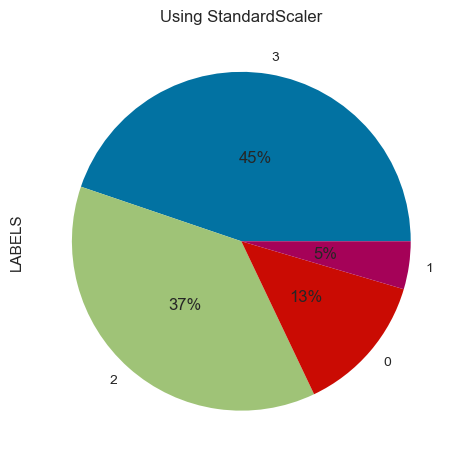

In [35]:
df_pca_SS.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, title="Using StandardScaler")

## Melihat distibusi data antara 3 cluster

<AxesSubplot:title={'center':'Using MinMax Scaler'}, ylabel='LABELS'>

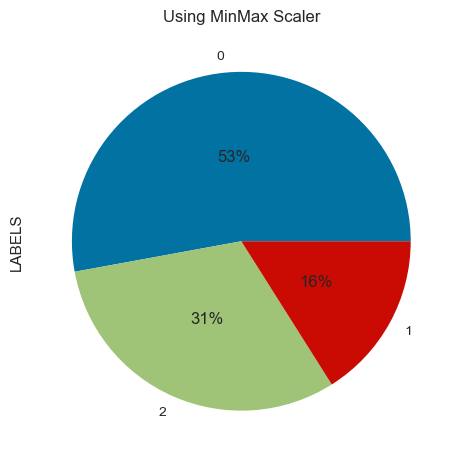

In [36]:
df_pca_MM.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, 
                                         title="Using MinMax Scaler")

## Melihat distribusi antara 5 cluster

<AxesSubplot:title={'center':'Using Robust Scaler'}, ylabel='LABELS'>

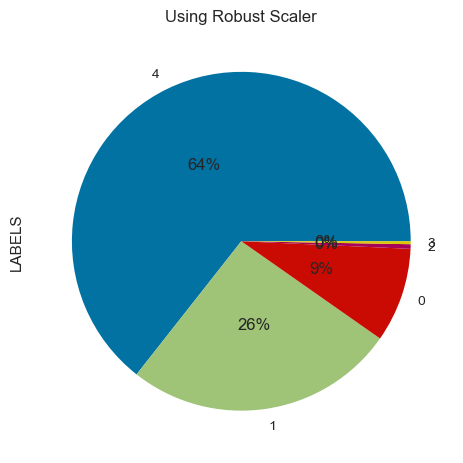

In [37]:
df_pca_RB.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.5, 
                                         labeldistance=1.1, title="Using Robust Scaler")

# Evaluasi Cluster

Dapat disimpulkan bahwa : 
- Semakin kecil nilai DaviesBouldin Index (DBI) yang diperoleh (non-negatif >= 0), maka semakin baik cluster yang diperoleh dari pengelompokan menggunakan algoritma clustering (Bates & Kalita 2016)
- Silhouette Coefficient sebuah nilai antara -1 dan 1. Semakin tinggi scorenya, semakin baik. score 1 mengindikasikan cluster yang kuat dan 0 berarti overlapping cluster.

In [38]:
print("Menggunakan MinMax Scaler : ")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_MM, labels_MM)}')
print(f'Silhouette Score = {silhouette_score(df_pca_MM, labels_MM)}')
print("========================================================================\n")

print("Menggunakan Robust Scaler : ")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_RB, labels_RB)}')
print(f'Silhouette Score = {silhouette_score(df_pca_RB, labels_RB)}')
print("========================================================================\n")

print("Menggunakan Standard Scaler : ")
print(f'Davies-Bouldin index = {davies_bouldin_score(df_pca_SS, labels_SS)}')
print(f'Silhouette Score = {silhouette_score(df_pca_SS, labels_SS)}')
print("========================================================================\n")

Menggunakan MinMax Scaler : 
Davies-Bouldin index = 0.7637431909603727
Silhouette Score = 0.5883262476576554

Menggunakan Robust Scaler : 
Davies-Bouldin index = 1.0322424645815649
Silhouette Score = 0.3442851963042149

Menggunakan Standard Scaler : 
Davies-Bouldin index = 1.372419153346493
Silhouette Score = 0.25489699196263843



Dari hasil skor di atas, jelas bahwa menggunakan MinMaxScaler untuk melakukan fitur scaling menghasilkan hasil cluster yang optimal; cluster tersebut memiliki skor DBI paling rendah dengan skor 0.76, yang menunjukkan bahwa semakin rendah skor DBI, semakin baik cluster tersebut. Selain itu, terlihat bahwa Skor Silhouette memiliki nilai yang lebih tinggi daripada yang lain, dengan nilai 0.5.88/0.59. Nilai Silhouette yang lebih dekat ke nilai 1 menunjukkan hasil cluster yang lebih baik.

## Menggunakan Silhouette

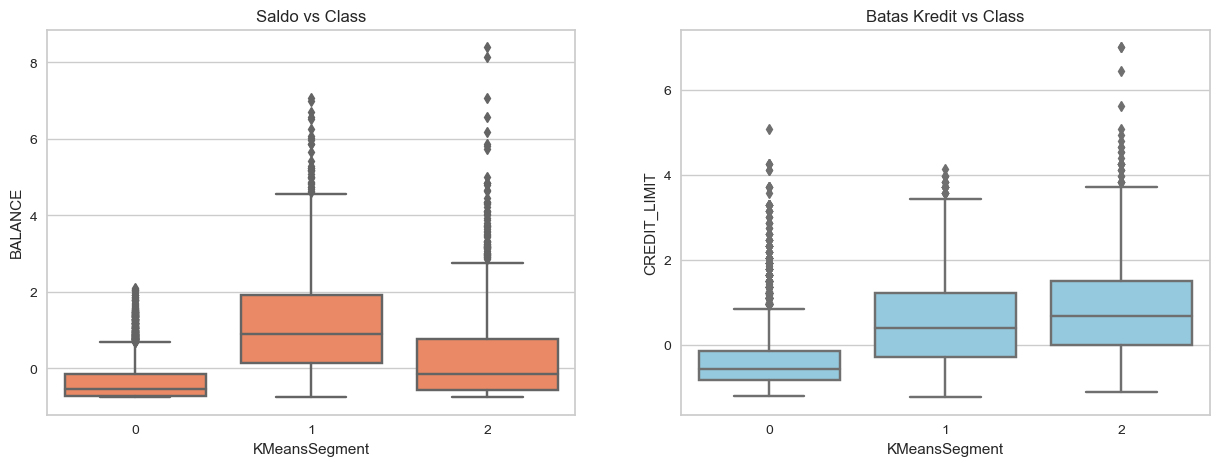

In [73]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = "KMeansSegment", y = "BALANCE", data  = df_kmean, color = "coral");
plt.title("Saldo vs Class")

plt.subplot(1,2,2)
sns.boxplot(x = "KMeansSegment", y = "CREDIT_LIMIT", data  = df_kmean, color = "skyblue");
plt.title("Batas Kredit vs Class")

plt.show()

Perbandingan antara harga vs class dan pembayaran vs class, menghasilkan informasi bahwa semakin tinggi harga suatu class, maka pembayaran juga akan semakin tinggi juga. Sehingga dihasilkan kesimpulan sebagai berikut:

- Class 0: limit kredit pengguna paling rendah & pengguna sangat jarang memperbaharui isi saldo
- Class 1: limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo
- Class 2: limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo

# Analisa Hasil Clustering

In [39]:
def plotting(data, title):
    mean = data.groupby("LABELS").mean().to_numpy()
    name_cols = data.columns[0:-1]
    lines_plot = np.linspace(start=0, stop=2 * np.pi, num=len(name_cols))
    cat = np.arange(0, len(mean))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(mean)):
        plt.plot(lines_plot, mean[i], label=f'class {cat[i]}')
    plt.title(f'Feature Comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(lines_plot), labels=name_cols)
    plt.legend()
    plt.show()

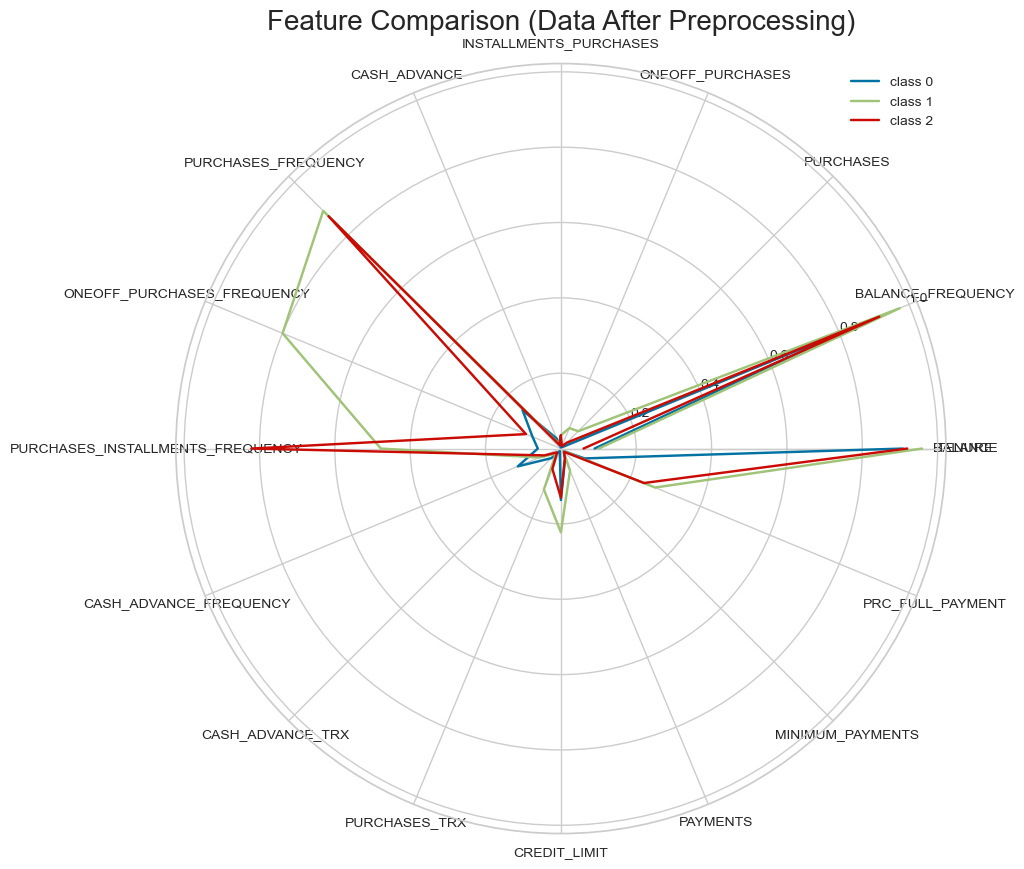

In [40]:
plotting(MM_scaler, 'Data After Preprocessing')

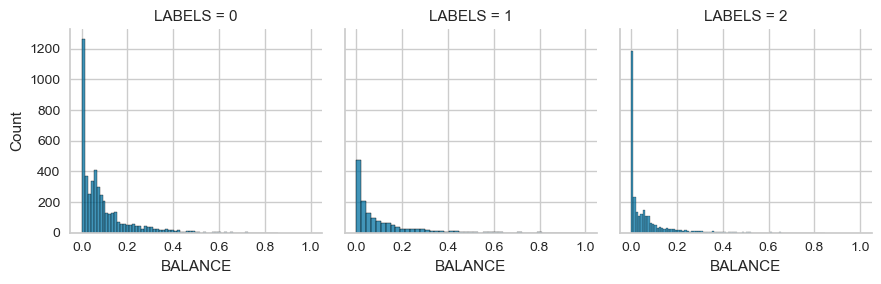

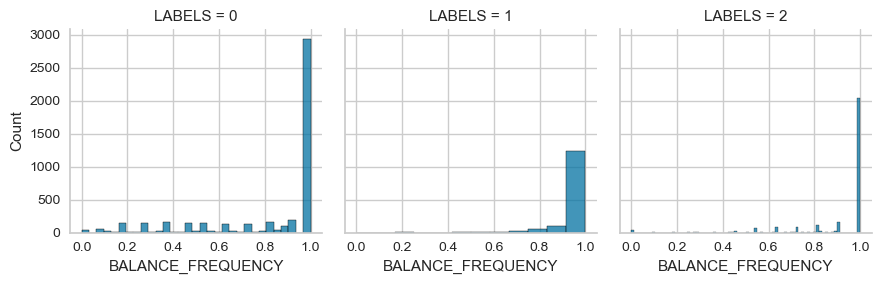

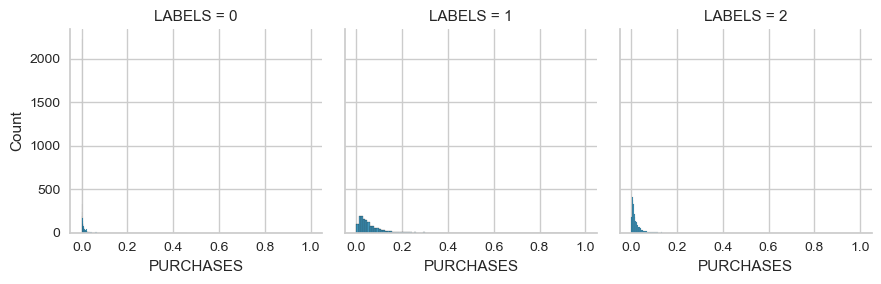

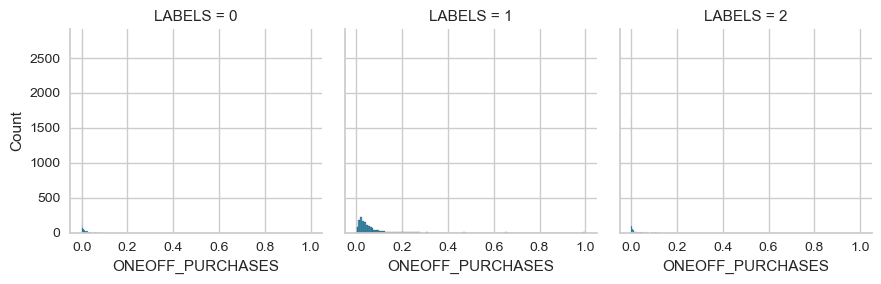

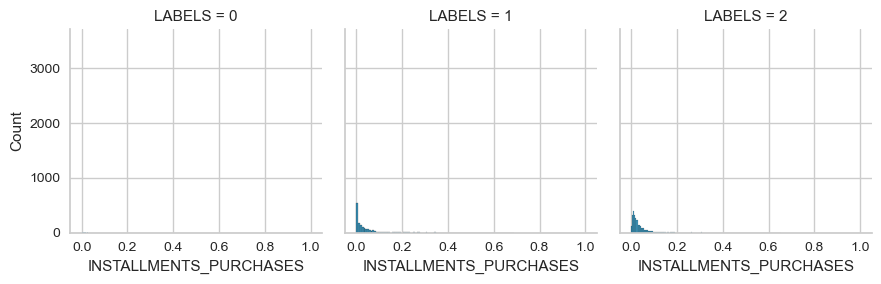

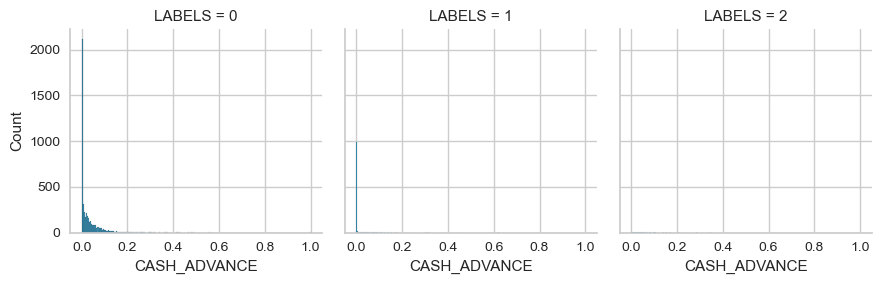

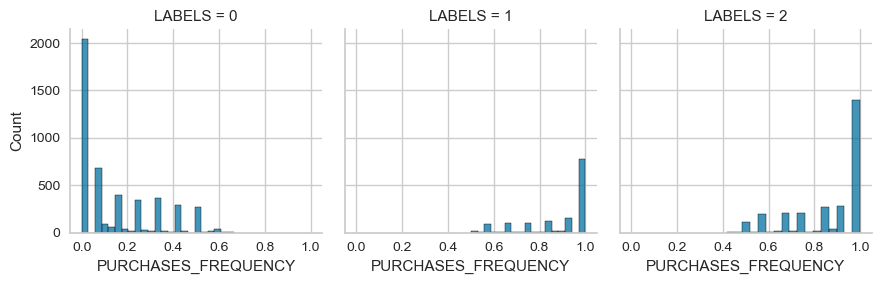

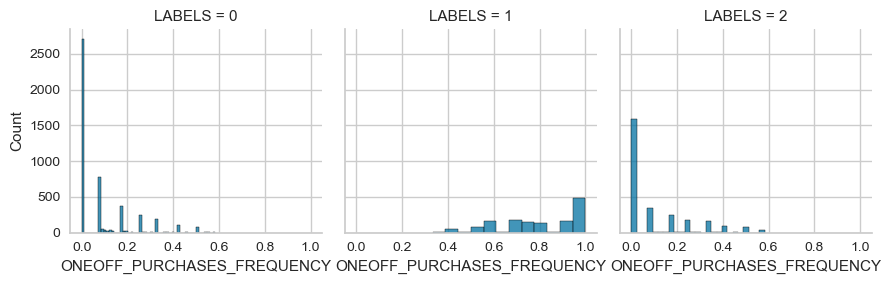

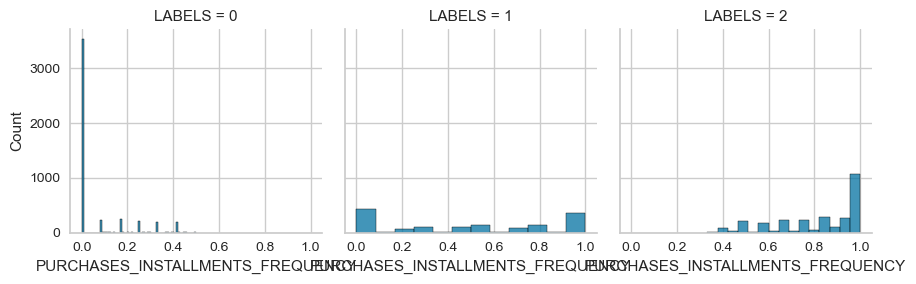

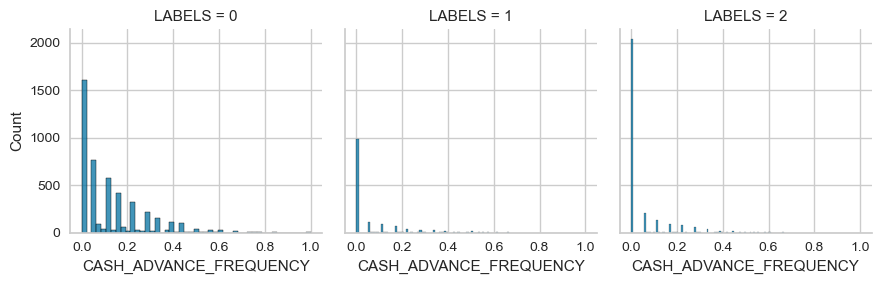

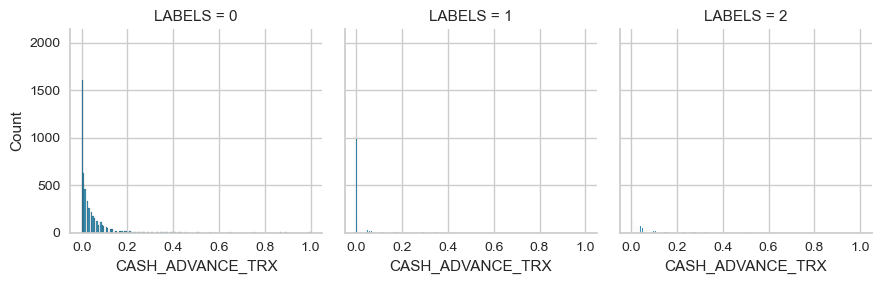

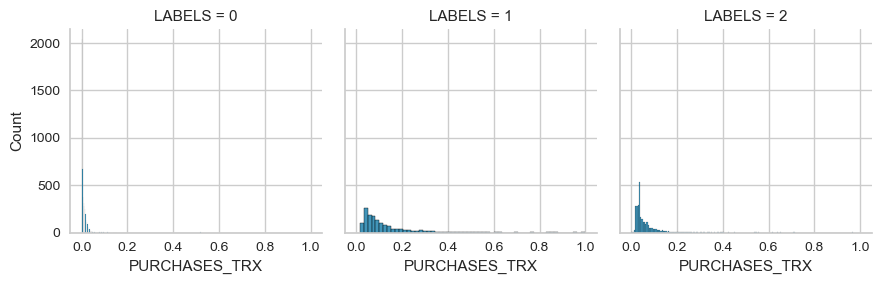

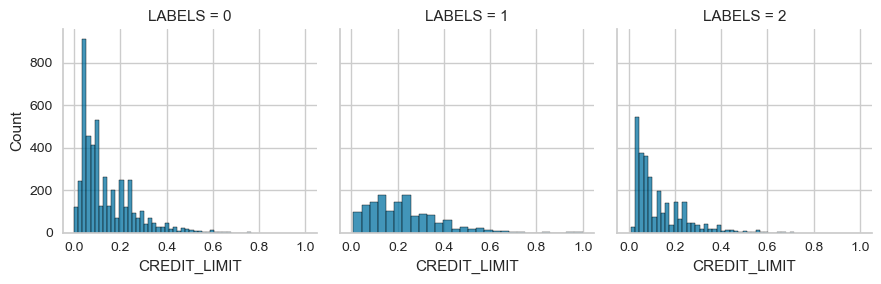

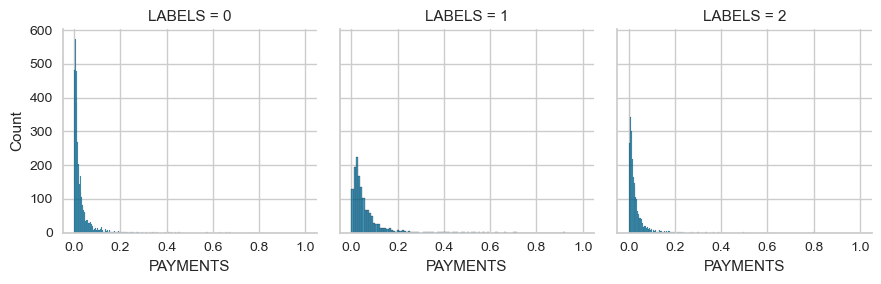

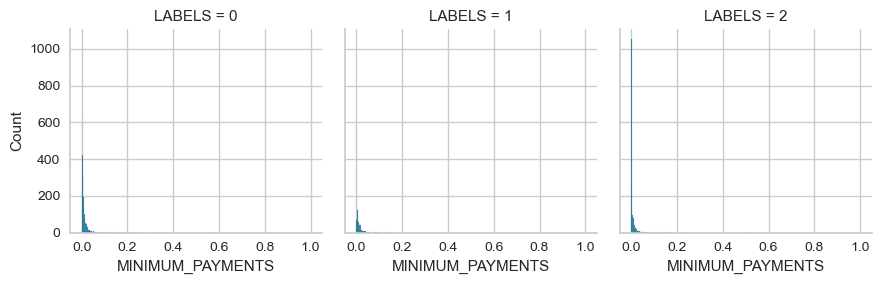

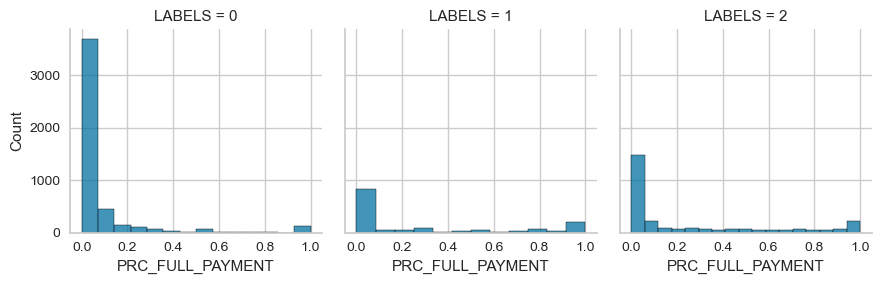

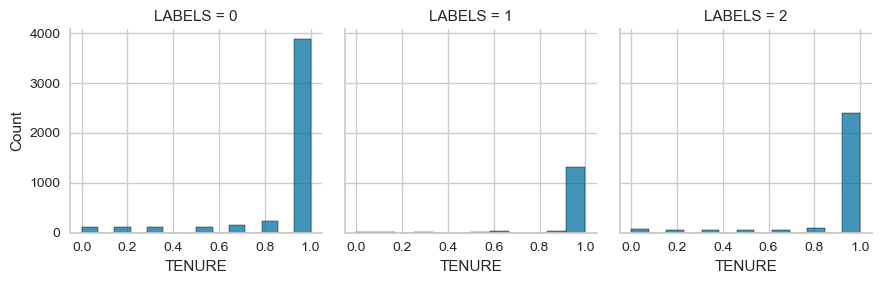

In [41]:
for x in MM_scaler.drop('LABELS', axis=1).columns:
    plot = sns.FacetGrid(MM_scaler, col='LABELS')
    plot.map(sns.histplot, x)

- Cluster 0 (Biru): Jenis pengguna dengan balance moderat; mereka jarang melakukan pembelian, lebih sering melakukan transaksi dengan uang tunai di muka, dan hampir tidak pernah melakukan pembelian dengan mencicil. User jenis ini biasanya memiliki limit kartu kredit medium dan tingkat tenur paling lama.
- Cluster 1 (Hijau): Memiliki saldo dan limit kartu kredit paling tinggi, lebih sering melakukan transaksi belanja, lebih sering menggunakan metode sekali bayar (one-off purchases), hampir tidak pernah melakukan pembelian dengan uang tunai di muka, dan biasanya memiliki periode tenure rendah.
- Cluster 2 (Merah): Cluster ini memiliki balance paling rendah dibandingkan cluster lain, melakukan pembelian dengan mencicil dengan sering, memiliki limit kartu kredit paling rendah, dan cenderung memiliki periode tenure medium.

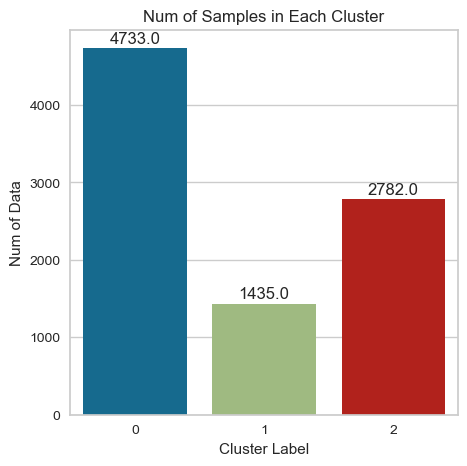

In [42]:
x = pd.Series(MM_scaler.LABELS).value_counts().sort_index().reset_index()
x.columns = ['Cluster Label', 'Num of Data']
plt.figure(figsize=(5,5))
plt.title("Num of Samples in Each Cluster")
ax = sns.barplot(data=x, x='Cluster Label', y='Num of Data')
for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')
plt.savefig('jumlah_titik.png')

Dari hasi bar chart bisa dilihat jumlah cluster 0 atau biru sebanyak 4733, cluster 1 atau hijay sebanyak 1435 dan cluster 2 atau merah sebanyak 2782.

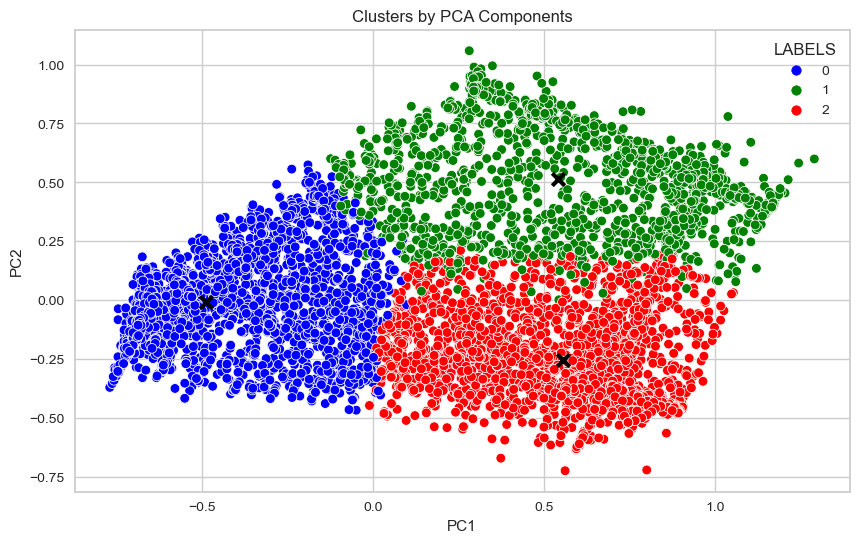

In [43]:
x_axis = df_pca_MM['PC1']
y_axis = df_pca_MM['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x_axis, y_axis, hue=df_pca_MM['LABELS'], palette=['blue','green','red'])
centroid = model_Kmeans_MM.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1],
            marker='x', s=80, linewidths=4,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()

## PCA untuk analisis Silhouette

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_scaled = pca.fit(scaled)

In [82]:
pc_columns = ['PC'+str(n) for n in range(1, len(pca_scaled.components_)+1)]
df_pca = pd.DataFrame(pca_scaled.transform(scaled), columns=pc_columns)

In [83]:
df_pca['KMeansSegment']= km.labels_
df_pca

PC1       PC2  KMeansSegment
0    -1.682220 -1.076451              0
1    -1.138295  2.506476              1
2     0.969684 -0.383520              0
3    -0.873628  0.043165              0
4    -1.599434 -0.688581              0
...        ...       ...            ...
8945 -0.359629 -2.016145              0
8946 -0.564369 -1.639123              0
8947 -0.926204 -1.810785              0
8948 -2.336552 -0.657966              0
8949 -0.556422 -0.400467              0

[8950 rows x 3 columns]

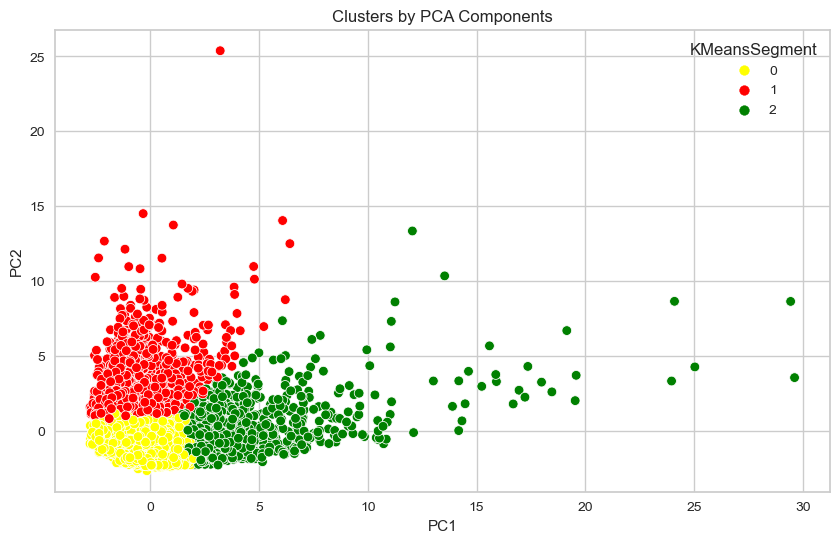

In [84]:
x_axis = df_pca['PC1']
y_axis = df_pca['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca['KMeansSegment'], palette=['yellow','red','green'])
plt.title('Clusters by PCA Components')
plt.show()

Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan menjadi 3 clustering, dimana ketiga cluster tersebut memiliki kriteria yang berbeda, yaitu:

- Kuning (Cluster 0) : limit kredit pengguna rendah & Pengguna jarang memperbaharui isi saldo.
- Merah (Cluester 1) : limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo,
- Hijau (Cluester 2) : limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo

## Model Inference 

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [86]:
from sklearn.preprocessing import StandardScaler

In [88]:
# Masukkan nilai input pengguna ke dalam variabel
BALANCE = float(input('BALANCE: '))
BALANCE_FREQUENCY = float(input('BALANCE_FREQUENCY: '))
PURCHASES = float(input('PURCHASES: '))
ONEOFF_PURCHASES = float(input('ONEOFF_PURCHASES: '))
INSTALLMENTS_PURCHASES = float(input('INSTALLMENTS_PURCHASES: '))
CASH_ADVANCE = float(input('CASH_ADVANCE: '))
PURCHASES_FREQUENCY = float(input('PURCHASES_FREQUENCY: '))
ONEOFF_PURCHASES_FREQUENCY = float(input('ONEOFF_PURCHASES_FREQUENCY: '))
PURCHASES_INSTALLMENTS_FREQUENCY = float(input('PURCHASES_INSTALLMENTS_FREQUENCY: '))
CASH_ADVANCE_FREQUENCY = float(input('CASH_ADVANCE_FREQUENCY: '))
CASH_ADVANCE_TRX = float(input('CASH_ADVANCE_TRX: '))
PURCHASES_TRX = float(input('PURCHASES_TRX: '))
CREDIT_LIMIT = float(input('CREDIT_LIMIT: '))
PAYMENTS = float(input('PAYMENTS: '))
MINIMUM_PAYMENTS = float(input('MINIMUM_PAYMENTS: '))
PRC_FULL_PAYMENT = float(input('PRC_FULL_PAYMENT: '))
TENURE = float(input('TENURE: '))

# Membuat list dari input pengguna
feature = [
     BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY,
     ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT,
     PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE
]

# Melakukan inisialisasi StandardScaler
sc = StandardScaler()

# Melakukan inisialisasi StandardScaler
sc = StandardScaler()

# Melakukan fit dan transform pada fitur
feature = sc.fit_transform([feature])

# Melakukan prediksi kluster
predict = km.predict(feature)

# Menampilkan hasil prediksi kluster
if predict == 0:
    print('Berdasarkan analisis, pengguna masuk ke dalam Cluster 0 (limit kredit pengguna rendah & pengguna jarang memperbaharui isi saldo)')
elif predict == 1:
    print('Berdasarkan analisis, pengguna masuk ke dalam Cluster 1 (limit kredit rata-rata & pengguna cukup sering memperbaharui isi saldo)')
elif predict == 2:
    print('Berdasarkan analisis, pengguna masuk ke dalam Cluster 2 (limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo)')

BALANCE:  50000
BALANCE_FREQUENCY:  2
PURCHASES:  1
ONEOFF_PURCHASES:  1
INSTALLMENTS_PURCHASES:  4
CASH_ADVANCE:  2
PURCHASES_FREQUENCY:  4
ONEOFF_PURCHASES_FREQUENCY:  1
PURCHASES_INSTALLMENTS_FREQUENCY:  3
CASH_ADVANCE_FREQUENCY:  1
CASH_ADVANCE_TRX:  2
PURCHASES_TRX:  1
CREDIT_LIMIT:  2
PAYMENTS:  1
MINIMUM_PAYMENTS:  4
PRC_FULL_PAYMENT:  1
TENURE:  1


Berdasarkan analisis, pengguna masuk ke dalam Cluster 0 (limit kredit pengguna rendah & pengguna jarang memperbaharui isi saldo)


# Kesimpulan :
Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:
1. Project ini membahas tentang penerapan algoritma Unsupervised Learning, yaitu Clustering. Metode Clustering yang akan digunakan adalah Principal Component Analysis (PCA) dan K-Means Clustering. Data yang digunakan dalam analisis klaster ini adalah data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut dan 8950 baris. Objektif dari project ini adalah mengelompokkan pengguna kartu kredit berdasarkan kebiasaan transaksi (transaction behaviour) yang dijalankannya ke dalam beberapa klaster.
2. Menggunakan K-means Clustering, 3 teknik data scaler yaitu MinMax Scaler, Robust Scaler dan Standard Scaler
3. Dari analisis diatas dihasilkan :
    - Cluster 0 (Biru): Jenis pengguna dengan balance moderat; mereka jarang melakukan pembelian, lebih sering melakukan transaksi dengan uang tunai di muka, dan hampir tidak pernah melakukan pembelian dengan mencicil. User jenis ini biasanya memiliki limit kartu kredit medium dan tingkat tenur paling lama.
    - Cluster 1 (Hijau): Memiliki saldo dan limit kartu kredit paling tinggi, lebih sering melakukan transaksi belanja, lebih sering menggunakan metode sekali bayar (one-off purchases), hampir tidak pernah melakukan pembelian dengan uang tunai di muka, dan biasanya memiliki periode tenure rendah.
    - Cluster 2 (Merah): Cluster ini memiliki balance paling rendah dibandingkan cluster lain, melakukan pembelian dengan mencicil dengan sering, memiliki limit kartu kredit paling rendah, dan cenderung memiliki periode tenure medium.
4. Dengan analisis Silhouette dapat dihasilkan data yang digunakan dapat dikelompokkan menjadi 3 clustering, dimana ketiga cluster tersebut memiliki kriteria yang berbeda, yaitu:

    - Cluster 0: limit kredit pengguna rendah & pengguna sangat jarang memperbaharui isi saldo
    - Cluster 1: limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo
    - Cluster 2: limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo.

# Save Model
Pada tahap menyimpan serta membaca data ke dalam/dari sebuah file dapat digunakannya sebuah modul pickle.

In [60]:
import pickle
model_Kmeans_MM.fit(df_pca_MM)
pickle.dump(model_Kmeans_MM, open('./cc_cluster_model.pkl','wb'))

In [61]:
MM_scaler.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'LABELS'],
      dtype='object')